## Coastal Pioneer Central Inshore (CP02PMCI) and Offshore Profiler (CP02PMCO) ADCP Data Quality Report 

**Evaluation Date**: July 31, 2018

**Evaluator**: Fatemeh Izaditame

## Review Summary (Needs modifications)
This report investigates the quality of the data obtained from the Acoustic Doppler current profiler (ADCP) instrument. The instrument is deployed at the Coastal Pioneer (CP) array on site Central Inshore/Offshore Profiler Mooring (PMCI and PMCO) and Mooring Riser at 107 and 125 m, respectively. ADCP’s are velocity profilers that use acoustics to measure 3D water-current velocity for a small volume of the water column above or below the sensor. High-frequency sound waves (75- to 600-kHz) emitted by the profiler scatter off suspended particles and back to the sensor. The sensor calculates velocity by measuring changes in these sound waves (i.e., Doppler shifts). This report is not necessarily a comprehensive examination of the quality of the ADCP data or a review of the ADCP instrument. Rather, it demonstrates some steps for visualization and understanding the data during the period 2014 to 2017. This report attempts to demonstrate the data quality approach, while not diving too deeply into specific data issues.

## 1. Instruments

In this report, I will evaluate and compare the Acoustic Doppler Current Profiler (ADCP) from the Coastal Pioneer (CP) Central Innshore Profiler (CP02PMCI) and Central Offshore Profiler (CP02PMCO). I am then mainly focusing on the period of May 2015 to October 2015. Additional instruments on the Inshore and Offshore profilers are listed for reference and could be used for further evaluation.



Inshore Profiler Instruments | Reference Designator | Method
 -- | -- | -- 
ADCP | [CP02PMCI-RII01-02-ADCPTG010](http://ooi.visualocean.net/instruments/view/CP02PMCI-RII01-02-ADCPTG010) | recovered_inst
3-D Single Point Velocity Meter | [CP02PMCI-WFP01-01-VEL3DK000](http://ooi.visualocean.net/instruments/view/CP02PMCI-WFP01-01-VEL3DK000) | recovered_wfp
Dissolved Oxygen | [CP02PMCI-WFP01-02-DOFSTK000](http://ooi.visualocean.net/instruments/view/CP02PMCI-WFP01-02-DOFSTK000) | recovered_wfp 
CTD | [CP02PMCI-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMCI-WFP01-03-CTDPFK000) | recovered_wfp

Offshore Profiler Instruments | Reference Designator | Method 
 -- | -- | -- 
CTD | [CP02PMCO-WFP01-03-CTDPFK000](http://ooi.visualocean.net/instruments/view/CP02PMCO-WFP01-03-CTDPFK000) | recovered_wfp
3-D Single Point Velocity Meter | [CP02PMCO-WFP01-01-VEL3DK000](http://ooi.visualocean.net/instruments/view/CP02PMCO-WFP01-01-VEL3DK000) | recovered_wfp 
Dissolved Oxygen | [CP02PMCO-WFP01-02-DOFSTK000](http://ooi.visualocean.net/instruments/view/CP02PMCO-WFP01-02-DOFSTK000) | recovered_wfp
3-Wavelength Fluorometer | [CP02PMCO-WFP01-04-FLORTK000](http://ooi.visualocean.net/instruments/view/CP02PMCO-WFP01-04-FLORTK000) | recovered_wfp

The ADCP instrument specific metadata fields and variables are available [here](http://ooi.visualocean.net/streams/view/adcp_velocity_earth). General instrument information can also be found at the [OOI webpage](http://oceanobservatories.org/instrument-class/adcp/).

## 1a. Central Inshore Profiler Setup

In what follows, I am defining the setup information for the Central Inshore profiler.

In [5]:
# Instrument Information
site1 = 'CP02PMCI' # Coastal Pioneer
node = 'RII01'
instrument = '02-ADCPTG010'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'

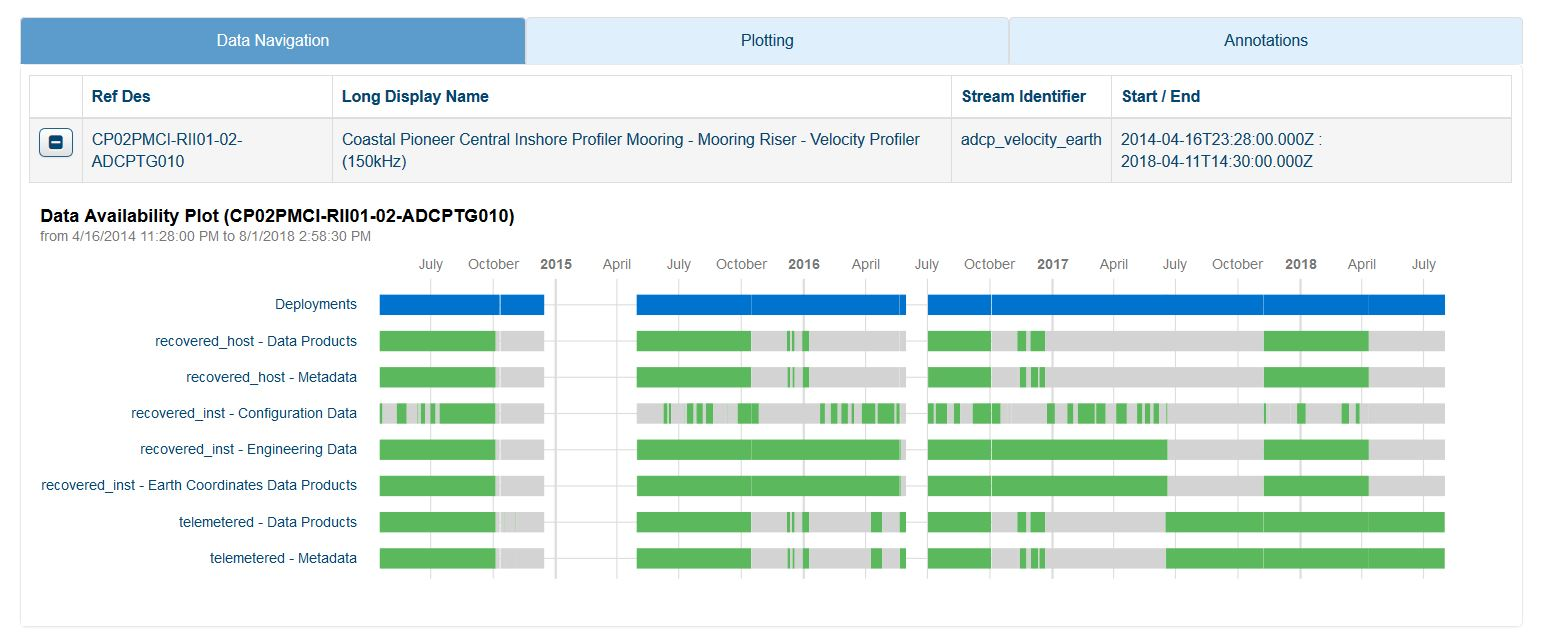

In [15]:
from IPython.display import Image
Image(filename='1.JPG',width=1500)

## 1b. Central Offshore Profiler Setup

In what follows, I am defining the setup information for the Central Offshore profiler.

In [6]:
# Setup Instrument Variables
site2 = 'CP02PMCO'
node = 'RII01'
instrument = '02-ADCPTG010'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'

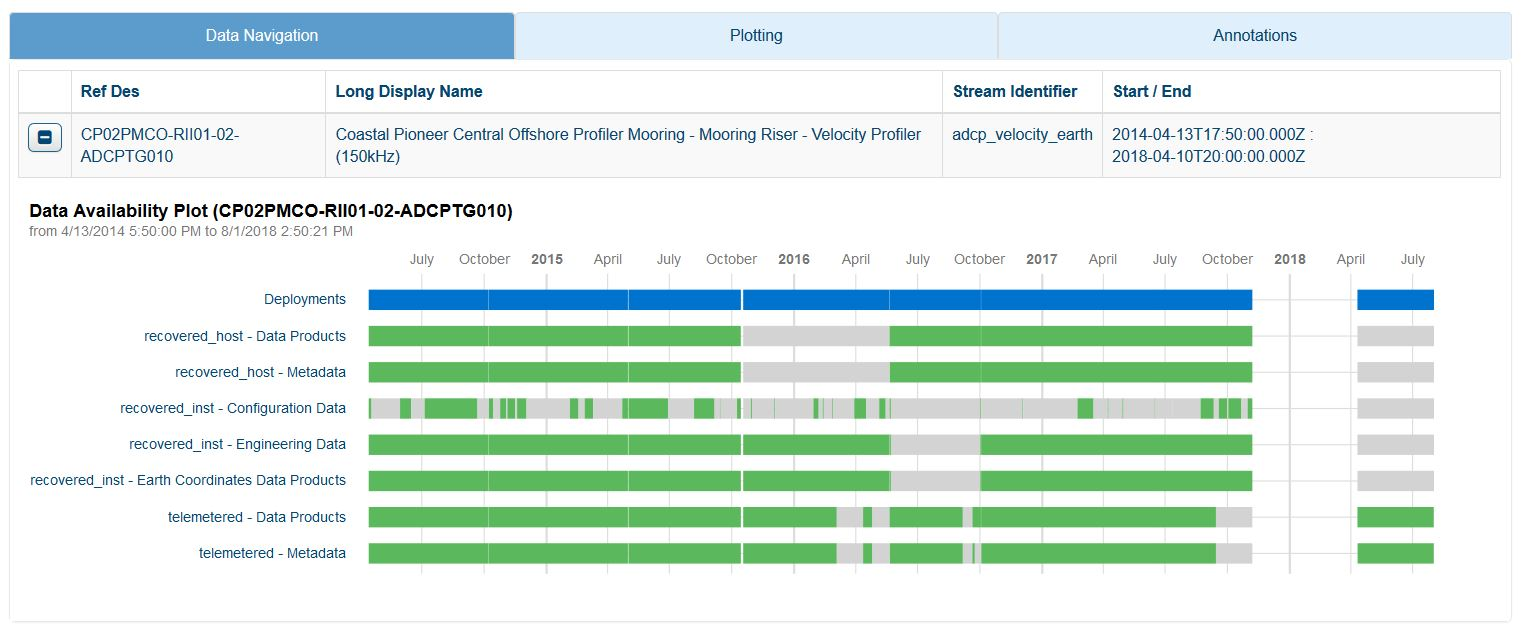

In [17]:
from IPython.display import Image
Image(filename='2.JPG',width=1500)

## 2. Time periods of interest (Needs modifications)

I will focus on the time periods between 2014 and 2017. This includes deployments 1 to 7 for the Inshore Profiler and deployments 1 to 8 for the Offshore Profiler. 

## 3. Related Metadata

In this section, I will review some of metadata available in the system to make sure it is present and correct. Before I get started, I will set up Python environment with some libraries, variables and functions I will need later in this report.

In [7]:
# Load Python libraries
import pandas as pd
import xarray as xr

import requests
import datetime
import time
import os
import re

The API login information including API Username and Token can be obtained from the OOI Net account.
The method and stream information can be retrieved, for example, from the following websites https://ooinet.oceanobservatories.org/data_access/#CP02PMCI-RII01-02-ADCPTG010/adcp_velocity_earth, https://ooinet.oceanobservatories.org/data_access/#CP02PMCO-RII01-02-ADCPTG010/adcp_velocity_earth for the Central Inshore and Offshore Profilers, respectively.

In [8]:
# API Information
USERNAME = ''
TOKEN =  ''

DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'
DataPath_NCDF = 'https://opendap.oceanobservatories.org/thredds/'
AnnotPath_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'

In [9]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

### 3a. Vocabulary Metadata

First, I am extracting the basic vocabulary information (metadata) from the system to make sure I have the correct instruments.

### 3a.1 Vocabulary Metadata for Central Inshore Profiler

In [10]:
 # Setup the API request url
data_request_url1 = '/'.join((VOCAB_API, site1, node,instrument)) #, , method, stream))
print(data_request_url1)

#Grab the information from the server
r = requests.get(data_request_url1, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMCI/RII01/02-ADCPTG010


[{'@class': '.VocabRecord',
  'model': 'WorkHorse Sentinel150khz - inductive',
  'manufacturer': 'Teledyne RDI',
  'vocabId': 487,
  'refdes': 'CP02PMCI-RII01-02-ADCPTG010',
  'instrument': 'Velocity Profiler (150kHz)',
  'tocL1': 'Coastal Pioneer',
  'tocL2': 'Central Inshore Profiler Mooring',
  'tocL3': 'Mooring Riser',
  'mindepth': 104.0,
  'maxdepth': 104.0}]

### 3a.2 Vocabulary Metadata for Central Offshore Profiler

In [11]:
 # Setup the API request url
data_request_url2 = '/'.join((VOCAB_API, site2,node, instrument))#, , method, stream))
print(data_request_url1)

#Grab the information from the server
r = requests.get(data_request_url2, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/CP02PMCI/RII01/02-ADCPTG010


[{'@class': '.VocabRecord',
  'model': 'WorkHorse Sentinel150khz - inductive',
  'manufacturer': 'Teledyne RDI',
  'vocabId': 500,
  'refdes': 'CP02PMCO-RII01-02-ADCPTG010',
  'instrument': 'Velocity Profiler (150kHz)',
  'tocL1': 'Coastal Pioneer',
  'tocL2': 'Central Offshore Profiler Mooring',
  'tocL3': 'Mooring Riser',
  'mindepth': 125.0,
  'maxdepth': 125.0}]

### 3b. Deployment Information

In this section I extract some information about the deployments for these instruments.  I will grab all of the deployments available in the system for the whole period and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each.  Note that the **reference designator** specified above represents the geographical location of an instrument across all deployments (e.g., the CTD on the Pioneer Upstream Offshore Profiler), the **Sensor ID** (and its Asset ID equivalent) represents the specific instrument used for a given deployment (i.e., a unique make, model, and serial numbered instrument).

### 3b.1 Deployment Information for Central Inshore Profiler

In [12]:
# Setup the API request url
data_request_url1 = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2014-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site1+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url1, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df1 = pd.DataFrame() # Setup empty array
for d in data:
  df1 = df1.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df1

asset_id  deployment  latitude  longitude              sensor  \
0    1805.0         1.0  40.22665 -70.888580  CGINS-ADCPTG-18596   
1    2823.0         2.0  40.22653 -70.877950  CGINS-ADCPTG-20495   
2    1775.0         3.0  40.22670 -70.888820  CGINS-ADCPTG-19151   
3    2823.0         4.0  40.22672 -70.877900  CGINS-ADCPTG-20495   
4    1775.0         5.0  40.22655 -70.888970  CGINS-ADCPTG-19151   
5    1775.0         6.0  40.22691 -70.889400  CGINS-ADCPTG-19151   
6    2823.0         7.0  40.22672 -70.878170  CGINS-ADCPTG-20495   
7    2003.0         8.0  40.22695 -70.888933  CGINS-ADCPTG-24543   
8    1775.0         9.0  40.22655 -70.878183  CGINS-ADCPTG-19151   

                start                stop  
0 2014-04-16 23:28:00 2014-10-10 12:02:00  
1 2014-10-11 18:11:00 2014-12-15 00:00:00  
2 2015-04-30 02:58:00 2015-10-15 12:03:00  
3 2015-10-15 18:11:00 2016-05-20 19:14:00  
4 2016-05-21 00:18:00 2016-05-30 12:05:00  
5 2016-07-01 17:53:00 2016-10-02 20:32:00  
6 2016-10-03 20:52:00 2017-06-17 12:12:00  
7 2017-06-16 19:55:00 2017-11-07 12:57:00  
8 2017-11-07 20:45:00 2018-04-11 13:46:00

### 3b.2 Deployment Information for Central Offshore Profiler from 2014 to 2018

In [24]:
# Setup the API request url
data_request_url2 = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2014-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site2+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url2, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df2 = pd.DataFrame() # Setup empty array
for d in data:
  df2 = df2.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df2

asset_id  deployment  latitude  longitude              sensor  \
0    1775.0         1.0  40.09605 -70.879720  CGINS-ADCPTG-19151   
1    1072.0         2.0  40.10123 -70.887680  CGINS-ADCPTG-19336   
2    1886.0         3.0  40.09668 -70.879400  CGINS-ADCPTG-18660   
3    1072.0         5.0  40.09652 -70.879120  CGINS-ADCPTG-19336   
4    1886.0         6.0  40.10068 -70.888200  CGINS-ADCPTG-18660   
5    1805.0         7.0  40.09633 -70.878900  CGINS-ADCPTG-18596   
6    2829.0         8.0  40.22695 -70.888433  CGINS-ADCPTG-20499   

                start                stop  
0 2014-04-13 17:50:00 2014-10-07 12:01:00  
1 2014-10-07 19:26:00 2015-05-01 00:00:00  
2 2015-05-01 18:34:00 2015-10-14 12:33:00  
3 2015-10-17 22:52:00 2016-05-20 12:09:00  
4 2016-05-20 17:43:00 2016-10-02 11:59:00  
5 2016-10-02 19:07:00 2017-06-16 12:02:00  
6 2017-06-16 01:19:00 2017-11-06 17:04:00

### 3c. Calibration Information

Acoustic Doppler current profilers (ADCP’s) have become a common tool for measuring 
streamflow and profiles of water velocity.  Despite their widespread use, no standard procedure has been adopted or accepted for calibration of ADCP’s (USGS, 2002).

When the system delivers data, it often uses a number of calibration coefficients to generated derived data products. I will next pull the calibration information for Deployment 7 for both instruments to see what the calibration information might look like and to make sure something has been added to the system for these deployments.

### 3c.1. Central Inshore Profiler Calibration Information 

In [25]:
# Setup the API request url
data_request_url1 = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-10-03T21:00:00.000Z',
  'endDT':'2016-10-04T12:00:00.000Z',
  'refdes':site1+'-'+node+'-'+instrument,
}

# Grab the information from the server
r = requests.get(data_request_url1, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df1 = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df1 = df1.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
print(df1)
df1 = df1.sort_values(by=['start','name'])
df1

             assetUid              name      start  stop  value
0  CGINS-ADCPTG-20495  CC_scale_factor1 2016-10-03  None   0.45
1  CGINS-ADCPTG-20495  CC_scale_factor3 2016-10-03  None   0.45
2  CGINS-ADCPTG-20495  CC_scale_factor2 2016-10-03  None   0.45
3  CGINS-ADCPTG-20495  CC_scale_factor4 2016-10-03  None   0.45


assetUid              name      start  stop  value
0  CGINS-ADCPTG-20495  CC_scale_factor1 2016-10-03  None   0.45
2  CGINS-ADCPTG-20495  CC_scale_factor2 2016-10-03  None   0.45
1  CGINS-ADCPTG-20495  CC_scale_factor3 2016-10-03  None   0.45
3  CGINS-ADCPTG-20495  CC_scale_factor4 2016-10-03  None   0.45

From the deployment table above, we can see that Deployment 7 began on October 03, 2016. The system uses the calibration values that are closest in time but before the deployment start date. Note also, that calibrations do not have an end date.  It is assumed they are valid until the next calibration for the specific asset. So in this case, for Deployment 7, the calibration date and the deployment date are the same. This means that probably none of the proposed calibration techniques by USGS (e. g. instrument comparison, two tanks method, discharge measurement comparisons) have been used for the instrument calibration in this case.



### 3c.2. Central Offshore Profiler Calibration Information

In [26]:
# Setup the API request url
data_request_url2 = ASSET_API + '/asset/cal'
params = {
  'beginDT':'2016-10-02T21:00:00.000Z',
  'endDT':'2016-10-03T12:00:00.000Z',
  'refdes':site2+'-'+node+'-'+instrument,
}

# Grab the information from the server
r = requests.get(data_request_url2, params=params, auth=(USERNAME, TOKEN))
data = r.json()

# Reformat the data into a pretty table
df2 = pd.DataFrame() # Setup empty array
for d in data:
  for dd in d['sensor']['calibration']:
    for ddd in dd['calData']:
      df2 = df2.append({
        'value': ddd['value'],
        'start': convert_time(ddd['eventStartTime']),
        'stop': convert_time(ddd['eventStopTime']),
        'name': ddd['eventName'],
        'assetUid': ddd['assetUid'],
        }, ignore_index=True)
    
print(df2)
df2 = df2.sort_values(by=['start','name'])
df2

             assetUid              name      start  stop  value
0  CGINS-ADCPTG-18596  CC_scale_factor1 2016-10-02  None   0.45
1  CGINS-ADCPTG-18596  CC_scale_factor3 2016-10-02  None   0.45
2  CGINS-ADCPTG-18596  CC_scale_factor2 2016-10-02  None   0.45
3  CGINS-ADCPTG-18596  CC_scale_factor4 2016-10-02  None   0.45


assetUid              name      start  stop  value
0  CGINS-ADCPTG-18596  CC_scale_factor1 2016-10-02  None   0.45
2  CGINS-ADCPTG-18596  CC_scale_factor2 2016-10-02  None   0.45
1  CGINS-ADCPTG-18596  CC_scale_factor3 2016-10-02  None   0.45
3  CGINS-ADCPTG-18596  CC_scale_factor4 2016-10-02  None   0.45

From the deployment table above, we can see that Deployment 7 began on October 02, 2016. The system uses the calibration values that are closest in time but before the deployment start date. Note also, that calibrations do not have an end date. It is assumed they are valid until the next calibration for the specific asset. So in this case, for Deployment 7, the calibration date and the deployment date are the same. This means that probably none of the proposed calibration techniques by USGS (e. g. instrument comparison, two tanks method, discharge measurement comparisons) have been used for the instrument calibration in this case.

To compare the profiler's data with the data collected using 3D single point velocity meter, I loaded the available data for the 3D Vel. in a separate file and I found out that no calibration data sheet is available for the 3D. Vel. meter as well. This is an important issue that needs to be taken care of.

### 3d. Annotations
In this section I pull relevant annotations for the ADCP instruments.

### 3d.1 Annotations for Central Inshore Profiler

In [27]:
refdes = '-'.join((site1, node, instrument))
params = {
  'beginDT':int(datetime.date(2014,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000, # int(datetime.datetime.now().strftime("%s")) * 1000 # current date
  'refdes':refdes,
}

r = requests.get(AnnotPath_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df1 = pd.DataFrame() # Setup empty array
for d in data:
  df1 = df1.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df1

annotation  \
0  Recovered data are not available because the Wire-Following Profiler motor and PAR cables were swapped and the data are thus unreliable.   
1  Telemetered data are sparse because telemetry schedule was irregular during this deployment.                                               
2  Instrument ceased transmitting data.                                                                                                       
3  Missing.                                                                                                                                   
4  Missing.                                                                                                                                   
5  Telemetry session associated with profile zero showed no communication with ADCP.                                                          

      id   node        sensor      site               start  \
0  228.0  None   None          CP02PMCI 2016-05-21 00:18:00   
1  232.0  None   None          CP02PMCI 2016-10-02 17:30:00   
2  231.0  RII01  02-ADCPTG010  CP02PMCI 2016-12-21 02:30:00   
3  393.0  RII01  02-ADCPTG010  CP02PMCI 2014-10-11 18:11:00   
4  392.0  RII01  02-ADCPTG010  CP02PMCI 2014-10-11 18:11:00   
5  604.0  RII01  02-ADCPTG010  CP02PMCI 2014-10-11 18:11:00   

                 stop  
0 2016-05-30 12:05:00  
1 2016-10-02 18:30:00  
2 2017-06-16 23:00:00  
3 2014-12-15 00:00:00  
4 2014-12-15 00:00:00  
5 2014-12-15 00:00:00

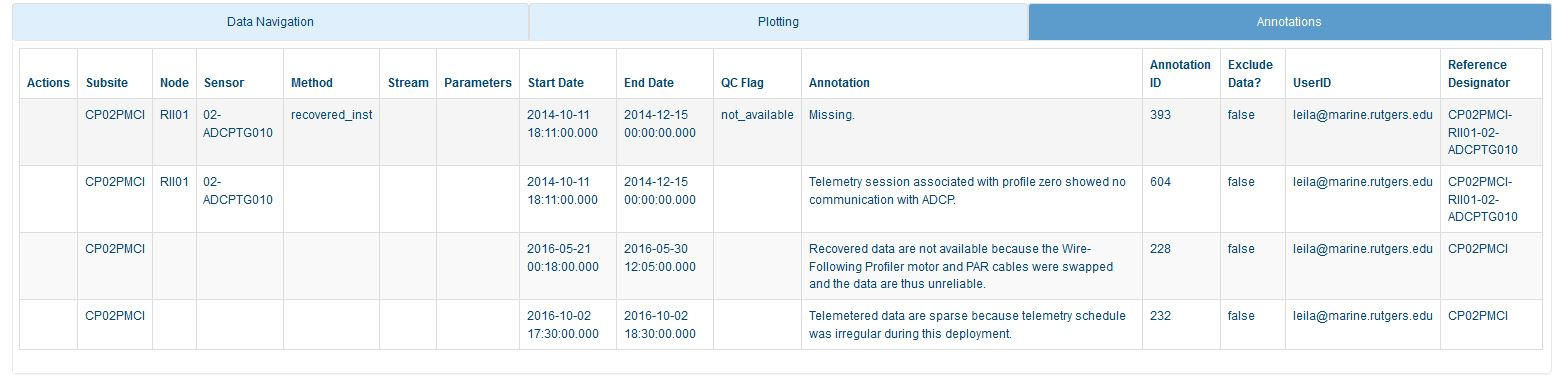

In [28]:
from IPython.display import Image
Image(filename='3.JPG',width=1500)

By comparing the GUI and code results, it turned out that some of the annotations are missing in the GUI.

As the annotations state, from 2016.05.21 to 2016.05.30 the recovered data are not reliable because the Wire-Following Profiler motor and PAR cables were swapped. From 2016.12.21 to 2017.06.16 the instrument seased transmitting data and data is missing for 2014.12.15. This means that the data are not reliable for these time spans.

### 3d.2 Annotations for Central Offshore Profiler

In [29]:
refdes = '-'.join((site2, node, instrument))
params = {
  'beginDT':int(datetime.date(2014,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000, # int(datetime.datetime.now().strftime("%s")) * 1000 # current date
  'refdes':refdes,
}

r = requests.get(AnnotPath_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df2 = pd.DataFrame() # Setup empty array
for d in data:
  df2 = df2.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df2

annotation  \
0  No telemetered data expected because communications were suspended after the battery was depleted.         
1  No telemetered data expected because communication were lost after the passge of tropical storm Hermine.   
2  Failed.                                                                                                    
3  Missing.                                                                                                   

      id   node        sensor      site               start  \
0  233.0  None   None          CP02PMCO 2016-03-03 10:40:15   
1  234.0  None   None          CP02PMCO 2016-09-05 09:05:48   
2  405.0  RII01  02-ADCPTG010  CP02PMCO 2017-11-07 01:11:00   
3  406.0  RII01  02-ADCPTG010  CP02PMCO 2015-10-17 22:52:00   

                 stop  
0 2016-05-20 12:09:00  
1 2016-10-02 11:59:00  
2 2018-04-10 17:00:00  
3 2016-05-20 00:00:00

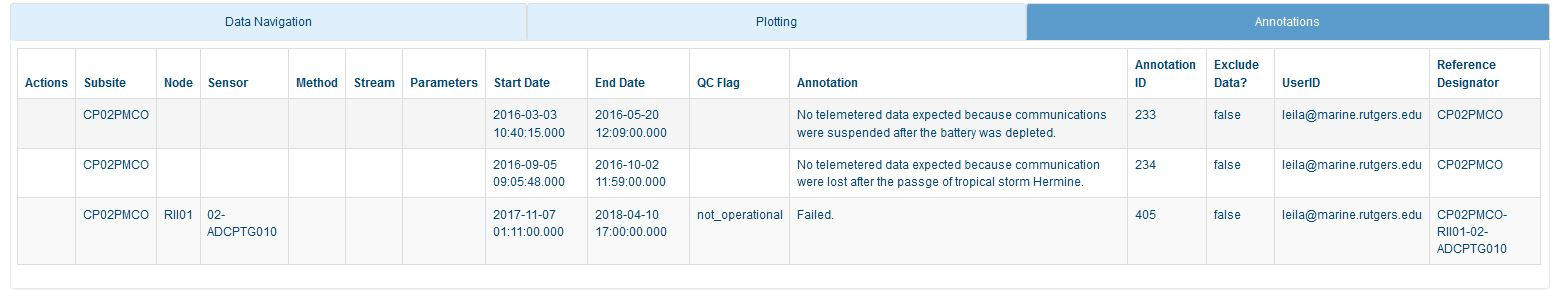

In [30]:
from IPython.display import Image
Image(filename='4.JPG',width=1500)

From the annotations, the istrument was failed from 2017.11.07 to 2018.04.10. Moreover the data is missing from 2015.10.17 to 2016.05.20. This means that the data are not reliable for these time spans.

## 4. The full dataset

In this section I load the whole range of data for Deployments 1 to 7. Before I get started, I  need to make sure that the xarray library installed and loaded into the environment.

In [14]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import cmocean

### 4a. The Full Dataset for Central Inshore Profiler

In [15]:
# Load the information from the server
# Instrument Information
site1 = 'CP02PMCI' # Coastal Pioneer
node = 'RII01'
instrument = '02-ADCPTG010'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url1 ='/'.join((SENSOR_BASE_URL,site1,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2014-04-01T00:00:00.000Z',
  'endDT':'2017-07-01T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [59]:
# r = requests.get(data_request_url1, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

Note that the data request lines are commented out above to prevent accidental resubmission when running through the entire notebook quickly.

In [60]:
print(data['allURLs'][0])

https://opendap.oceanobservatories.org/thredds/catalog/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/catalog.html


Next, I check if the request is completed. I can use the second URL to check if a status.txt file has been written to the location. If true, then the request has completed, and all data have been delivered to the THREDDS server. The following for loop will poll the location for the status.txt files 1000 times, once every second. Therefore, it will quit after about 16.6 minutes. If you are requesting a very large and dense dataset (for example, three years of BOTPT data collected at 20 Hz), it may take a bit longer to complete the request, so you will want to bump up the retry range or lower the sleep interval.

In [61]:
%%time
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1000): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

request completed
CPU times: user 4.07 s, sys: 304 ms, total: 4.37 s
Wall time: 3min 41s


In [16]:
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/catalog.html'

By finding all files available, I can concatenate all the .nc files together as follows.

In [17]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0007_CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20161003T210000-20170617T120000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0006_CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20160701T180000-20161002T203000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0004_CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20151015T183000-20160520T190000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T224946-CP02PMCI-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0003_CP02PMCI-RII01-02-ADCPTG

Now I can use open_mfdataset() to load all files into a single xarray dataset.

In [18]:
# Load the data files
ds = xr.open_mfdataset(datasets)

In [29]:
# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds = ds.swap_dims({'obs': 'time'}) 

# Sort the data
ds = ds.sortby('time'); 

# Optional, this is used to optimize data processing
ds = ds.chunk({'time': 100}) 

ds

<xarray.Dataset>
Dimensions:                         (bin: 29, time: 57191)
Coordinates:
    obs                             (time) int64 dask.array<shape=(57191,), chunksize=(100,)>
  * time                            (time) datetime64[ns] 2014-04-16T23:30:00 ...
    pressure                        (time) float64 dask.array<shape=(57191,), chunksize=(100,)>
    lat                             (time) float64 dask.array<shape=(57191,), chunksize=(100,)>
    lon                             (time) float64 dask.array<shape=(57191,), chunksize=(100,)>
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 dask.array<shape=(57191,), chunksize=(100,)>
    id                              (time) |S64 dask.array<shape=(57191,), chunksize=(100,)>
    bin_1_distance                  (time) float32 dask.array<shape=(57191,), chunksize=(100,)>
    cell_length                     (time) float32 dask.array<shape=(57191,), chunksize=(100,)>
    correlation_

### 4b. The Full Dataset for Central Offshore Profiler

In this section, I repeated everything I did above to load the full dataset for the central offshore profiler.

In [19]:
# Load the information from the server
# Instrument Information
site2 = 'CP02PMCO'
node = 'RII01'
instrument = '02-ADCPTG010'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# Create the request URL
data_request_url2 ='/'.join((SENSOR_BASE_URL,site2,node,instrument,method,stream))

# All of the following are optional
params = {
  'beginDT':'2014-04-01T00:00:00.000Z',
  'endDT':'2017-07-01T00:00:00.000Z',
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [34]:
# r = requests.get(data_request_url2, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

In [73]:
%%time
check_complete = data['allURLs'][1] + '/status.txt'
for i in range(1000): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

request completed
CPU times: user 4.83 s, sys: 389 ms, total: 5.22 s
Wall time: 4min 5s


In [20]:
url2='https://opendap.oceanobservatories.org/thredds/catalog/ooi/fizadi@udel.edu/20180801T225636-CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/catalog.html'

In [21]:
tds_url2 = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets2 = requests.get(url2).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets2)
x = re.findall(r'(ooi/.*?.nc)', datasets2)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets2 = [os.path.join(tds_url, i) for i in x]
datasets2

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T225636-CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0008_CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20170616T013000-20170630T233000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T225636-CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0007_CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20161002T193000-20170616T120000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T225636-CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0005_CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth_20151017T230000-20160520T120000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/fizadi@udel.edu/20180801T225636-CP02PMCO-RII01-02-ADCPTG010-recovered_inst-adcp_velocity_earth/deployment0003_CP02PMCO-RII01-02-ADCPTG

Now I can use open_mfdataset() to load all files into a single xarray dataset.

In [22]:
# Load the data files
ds2 = xr.open_mfdataset(datasets2)

In [30]:
# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds2 = ds2.swap_dims({'obs': 'time'}) 

# Sort the data
ds2 = ds2.sortby('time'); 

# Optional, this is used to optimize data processing
ds2 = ds2.chunk({'time': 100}) 

ds2

<xarray.Dataset>
Dimensions:                         (bin: 35, time: 75941)
Coordinates:
    obs                             (time) int64 dask.array<shape=(75941,), chunksize=(100,)>
  * time                            (time) datetime64[ns] 2014-04-13T18:00:00 ...
    pressure                        (time) float64 dask.array<shape=(75941,), chunksize=(100,)>
    lat                             (time) float64 dask.array<shape=(75941,), chunksize=(100,)>
    lon                             (time) float64 dask.array<shape=(75941,), chunksize=(100,)>
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 dask.array<shape=(75941,), chunksize=(100,)>
    id                              (time) |S64 dask.array<shape=(75941,), chunksize=(100,)>
    bin_1_distance                  (time) float32 dask.array<shape=(75941,), chunksize=(100,)>
    cell_length                     (time) float32 dask.array<shape=(75941,), chunksize=(100,)>
    correlation_

## 5. Plotting and analyzing the data
In this secion, I illustrate some data using plots. First, I will illustrate all of the deployments from 2014 to 2017, and then I will narrow down the time to focus more on the data for a shorter period of time (i.e. 2015-5 to 2015-10).

Please note that, I plotted all the data for the Inshore station in red, and for the offshore station in blue, for the ease in recognition and comparision.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns # package for nice plotting defaults
sns.set()

from matplotlib import colors
from pylab import figure, axes, pie, title, show, savefig

### 5a.1. Define Variables for Central Inshore Profiler 

In [24]:
time1 = ds['time'].data
depth1 = ds['bin_depths'].data.T
U1 = ds['eastward_seawater_velocity'].data.T
V1 = ds['northward_seawater_velocity'].data.T
W1 = ds['upward_seawater_velocity'].data.T
pitch1 = ds['pitch'].data/(100)
roll1 = ds['roll'].data/(100)
heading1 = ds['heading'].data/(100)
temp1 = ds['temperature'].data/(100)
pres1 = ds['pressure'].data
sal1 = ds['salinity'].data/(100)

### 5a.2. Plots for Central Inshore Profiler

I am checking the stability of the instrument configuration over time in this section. In their raw format, data are measured along each of the ADCP beams. In order to get the information referenced to earth coordinates (ENU) it is therefore necessary to detect the instrument's orientation in space. Attitude sensors, such as pitch, roll, and compass heading (as shown in the figure below) are therefore used to aid in the transformation needed to correct for the instrument's attitute and motion.
When the instrument is tilted during deployment, the measurement cell from e.g. beam 1 does not correspnd to the same measurement of e.g. beam 2, as sketched below (from www.Nortekgroup.com) and this causes error in the measurements.

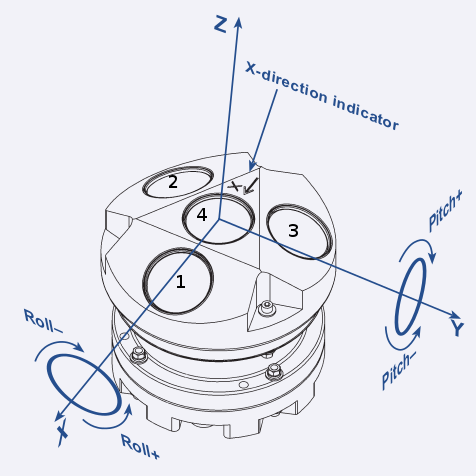

In [85]:
from IPython.display import Image
Image(filename='7.png',width=400)

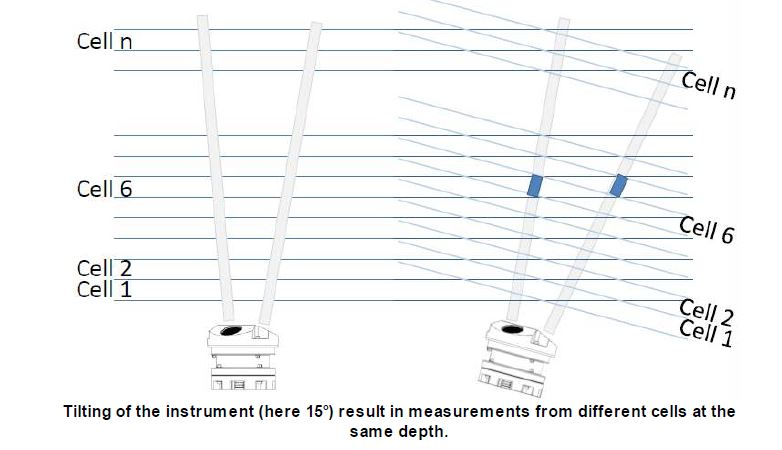

In [86]:
from IPython.display import Image
Image(filename='5.JPG',width=800)

In this figure, depth cell 6 from the first beam corresponds to depth cell 7 of the second beam when the instrument is tilted. In profilers, the velocity is measured in fixed cells along each acoustic beam. The length of each cell or cell size is defined as a time interval multiplied by the speed of sound, which is then projected onto the vertical axis. Now, when the beam axis is not vertical, the size of the cell will not be the same in beam 1 as beam 2 when tilted. That's why we need to control pitch, roll to make sure that the measured velocities are accurate.

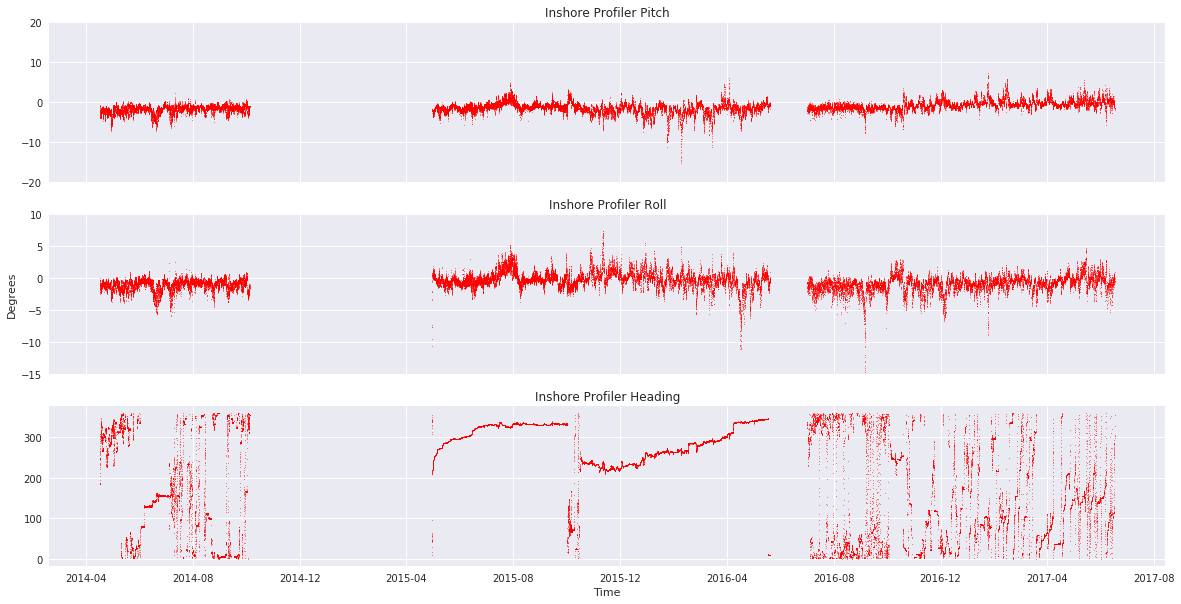

In [45]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = False, figsize = (20,10))

p0 = axes[0].plot(time1, pitch1, linestyle = 'None', marker = '.', markersize = 1.2,c='r')
axes[0].set_title('Inshore Profiler Pitch')
axes[0].set_ylim(-20,20)

p1 = axes[1].plot(time1, roll1,linestyle='None',marker='.',markersize=1.2,c='r')
axes[1].set_title('Inshore Profiler Roll')
axes[1].set_ylabel('Degrees')
axes[1].set_ylim(-15,10)

p2 = axes[2].plot(time1, heading1,linestyle='None',marker='.',markersize=1.2,c='r')
axes[2].set_title('Inshore Profiler Heading')
axes[2].set_xlabel('Time')

plt.show()

Let's average the pitch, roll, and heading parameters to see if they make sense.

#### Please note that the data for attitute and motion sensors (i.e. pitch, roll, and heading) are reported originally in centi-degrees (not deci degrees)

In [46]:
pitch_ave1 = np.nanmean(abs(pitch1))
roll_ave1 = np.nanmean(abs(roll1))
heading_ave1 = np.nanmean(abs(heading1))

In [47]:
pitch_ave1,roll_ave1,heading_ave1

(1.4992945, 1.0450783, 222.34982)

Based on the calculated averages and the trends for the motion, the instrument seems to be stable during the course of deployments. What follows is the pitch, roll, and heading data from one of my deployments. As it can be seen, the roll and pitch data should be very small for a stable deployment.

In [48]:
from IPython.display import Image
Image(filename='6.png',width=950)

Let's check the changes in water pressure with time. The pressure sensor in an ADCP measures water pressure (water depth).

Text(0.5,0,'time')

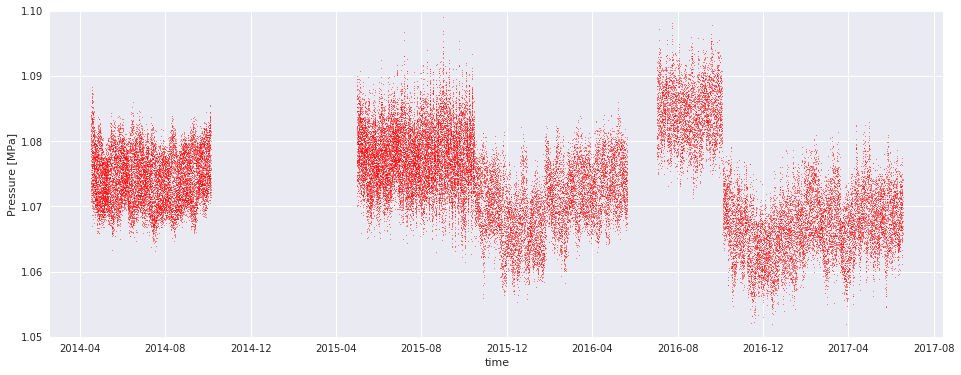

In [49]:
fig = plt.figure(figsize=(16,6))
plt.plot(time1,pres1*1e-5,linestyle='None', marker='.',markersize=1.2, c='r')
plt.ylim(1.05,1.1)
plt.ylabel('Pressure [MPa]')
plt.xlabel('time')

The oscillations for the water pressure is high during a short period of time and ADCP seems not to be the best instrument for measuring water depth (pressure), at least in this case.

Now, I am going to plot the changes of presure and temperature as a function of time.

Text(0,0.5,'Pressure [MPa]')

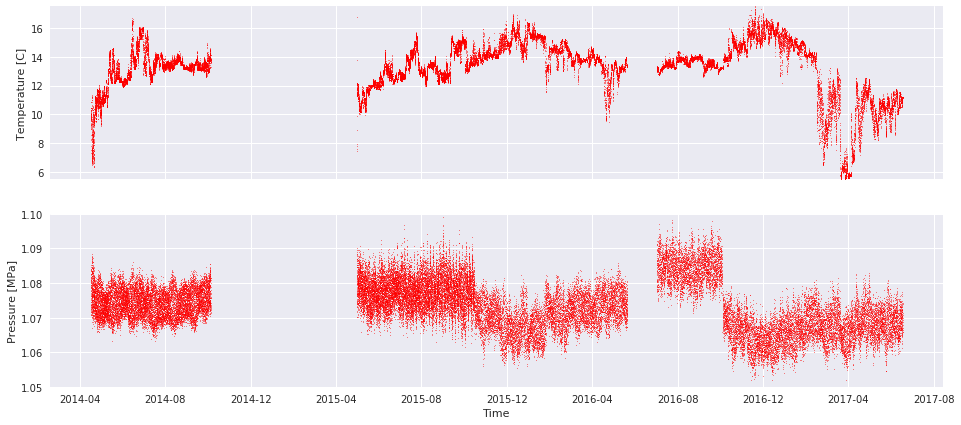

In [50]:
plt.close()
fig, axes = plt.subplots(2, sharex = True, sharey = False, figsize = (16,7))

p0 = axes[0].plot(time1, temp1, linestyle = 'None', marker = '.', markersize = 1.2,c='r')
axes[0].set_ylim(5.5,17.5)
axes[0].set_ylabel('Temperature [C]')

p1 = axes[1].plot(time1, pres1*1e-5, linestyle = 'None', marker = '.', markersize = 1.2, c='r')
axes[1].set_ylim(1.05,1.1)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Pressure [MPa]')

The temperature data looks noisy for 2017.

Next, I will look at the velocities obtained by the ADCP. To screen out surface noise velocities, I will set the color-bar limit to the 90th percentile of the data. Note that np.nanpercentile() is only valid if the data are normally distributed.

In [51]:
U1Lim = float("%2.2f" % np.nanpercentile(U1, 90))
V1Lim = float("%2.2f" % np.nanpercentile(V1, 90))
W1Lim = float("%2.2f" % np.nanpercentile(W1, 90))
C1Max = max([U1Lim, V1Lim, W1Lim])

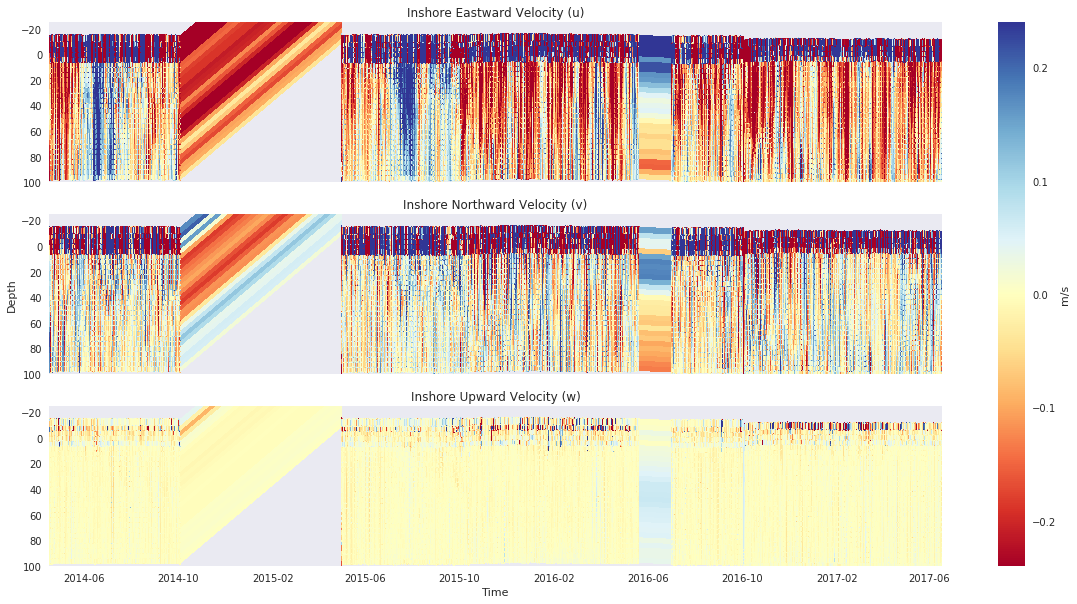

In [52]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (20,10))

YB = 100; YE = -25

p0 = axes[0].pcolormesh(time1, depth1, U1, cmap = 'RdYlBu', vmin = -C1Max, vmax = C1Max)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Inshore Eastward Velocity (u)')

p1 = axes[1].pcolormesh(time1, depth1, V1, cmap = 'RdYlBu', vmin = -C1Max, vmax = C1Max)
axes[1].set_title('Inshore Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time1, depth1, W1, cmap = 'RdYlBu', vmin = -C1Max, vmax = C1Max)
axes[2].set_title('Inshore Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

As we can see from the above figure, here the ADCP obtained velocity data about 15m above the surface in the air. There data is  very noisy and should be disregarded. Moreover, as expected, the data near the surface becomes quite noisy. It should also be noted that the **depth 0m** is at the surface and the instrument located at the depth 107m. Moreover, the eastward velocity looks questionable for 2015-05 to 2015-06. The data shows that the flow direction changes for that period of time. The only explanation for this is having an extreme event in that period of time, which has not been reported in the annotations.

### 5b.1. Define Variables for Central Offshore Profiler

In [25]:
time2 = ds2['time'].data
depth2 = ds2['bin_depths'].data.T
U2 = ds2['eastward_seawater_velocity'].data.T
V2 = ds2['northward_seawater_velocity'].data.T
W2 = ds2['upward_seawater_velocity'].data.T
pitch2 = ds2['pitch'].data/(100)
roll2 = ds2['roll'].data/(100)
heading2 = ds2['heading'].data/(100)
temp2 = ds2['temperature'].data/(100)
pres2 = ds2['pressure'].data
sal2 = ds2['salinity'].data/(100)

### 5b.2. Plots for Central Offshore Profiler

Let's check the pitch, roll, and heading for the offshore profiler.

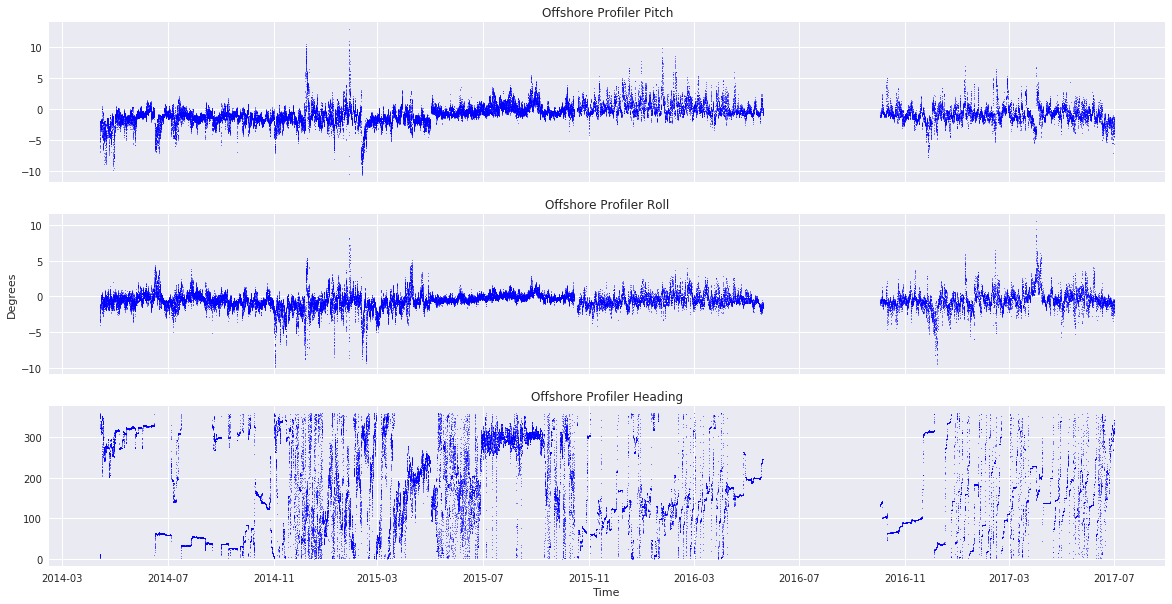

In [54]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = False, figsize = (20,10))

p0 = axes[0].plot(time2, pitch2, linestyle = 'None', marker = '.', markersize = 1.2,c='b')
axes[0].set_title('Offshore Profiler Pitch')

p1 = axes[1].plot(time2, roll2,linestyle='None',marker='.',markersize=1.2,c='b')
axes[1].set_title('Offshore Profiler Roll')
axes[1].set_ylabel('Degrees')

p2 = axes[2].plot(time2, heading2,linestyle='None',marker='.',markersize=1.2,c='b')
axes[2].set_title('Offshore Profiler Heading')
axes[2].set_xlabel('Time')

plt.show()

In [55]:
pitch_ave2 = np.nanmean(abs(pitch2))
roll_ave2 = np.nanmean(abs(roll2))
heading_ave2 = np.nanmean(abs(heading2))

In [56]:
pitch_ave2,roll_ave2,heading_ave2

(1.3333484, 0.9172249, 181.29086)

Based on the calculated averages and the trends for the motion, the instrument seems to be stable during the course of deployments.

Text(0,0.5,'Pressure [MPa]')

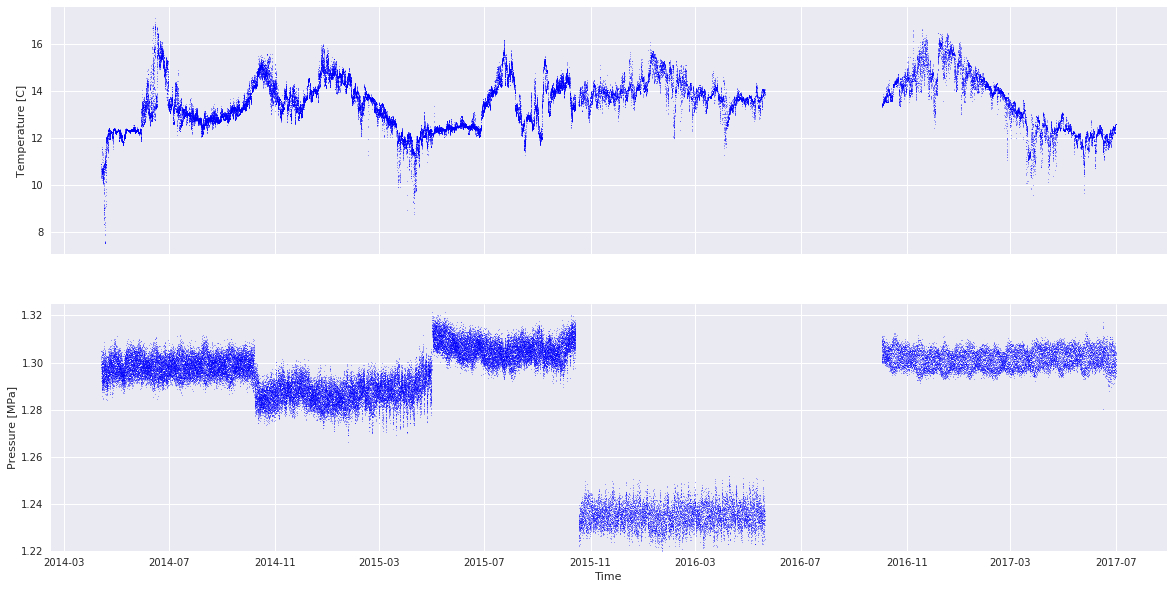

In [141]:
plt.close()
fig, axes = plt.subplots(2, sharex = True, sharey = False, figsize = (20,10))

p0 = axes[0].plot(time2, temp2, linestyle = 'None', marker = '.', markersize = 1,c='b')

axes[0].set_ylabel('Temperature [C]')

p1 = axes[1].plot(time2, pres2*1e-5, linestyle = 'None', marker = '.', markersize = 1,c='b')
axes[1].set_ylim(1.22,1.325)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Pressure [MPa]')

In [58]:
U2Lim = float("%2.2f" % np.nanpercentile(U2, 90))
V2Lim = float("%2.2f" % np.nanpercentile(V2, 90))
W2Lim = float("%2.2f" % np.nanpercentile(W2, 90))
C2Max = max([U2Lim, V2Lim, W2Lim])

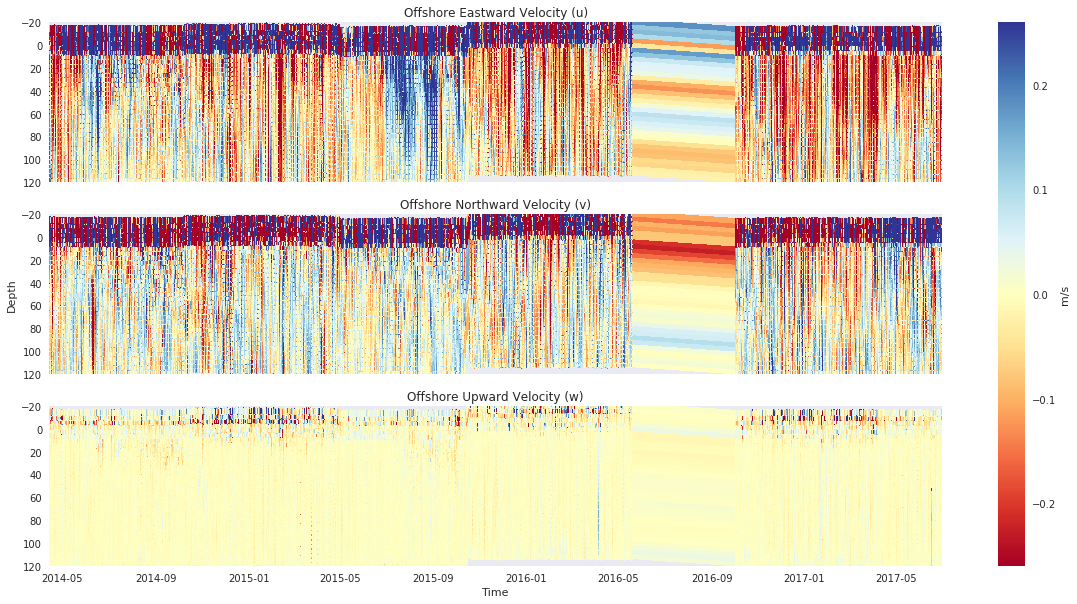

In [59]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (20,10))

YB = 120; YE = -20

p0 = axes[0].pcolormesh(time2, depth2, U2, cmap = 'RdYlBu', vmin = -C2Max, vmax = C2Max)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Offshore Eastward Velocity (u)')

p1 = axes[1].pcolormesh(time2, depth2, V2, cmap = 'RdYlBu', vmin = -C2Max, vmax = C2Max)
axes[1].set_title('Offshore Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time2, depth2, W2, cmap = 'RdYlBu', vmin = -C2Max, vmax = C2Max)
axes[2].set_title('Offshore Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

As we can see from the above figure, here the ADCP obtained velocity data about 15m above the surface in the air. There data is  very noisy and should be disregarded. Moreover, as expected, the data near the surface becomes quite noisy. It should also be noted that the **depth 0m** is at the surface and the instrument located at the depth 125m.  Moreover, the eastward velocity looks questionable for 2015-05 to 2015-06. The data shows that the flow direction changes for that period of time. However, this is in line with what we saw in Inshore profiler data. This increases the chance of the presence of an extreme event in that time.

### 5e. Compare the results for Inshore and Offshore Profilers

In this section, I am comparing the temperature data for 2014-2017 for using Inshore (in red) and Offshore (in blue) profilers.

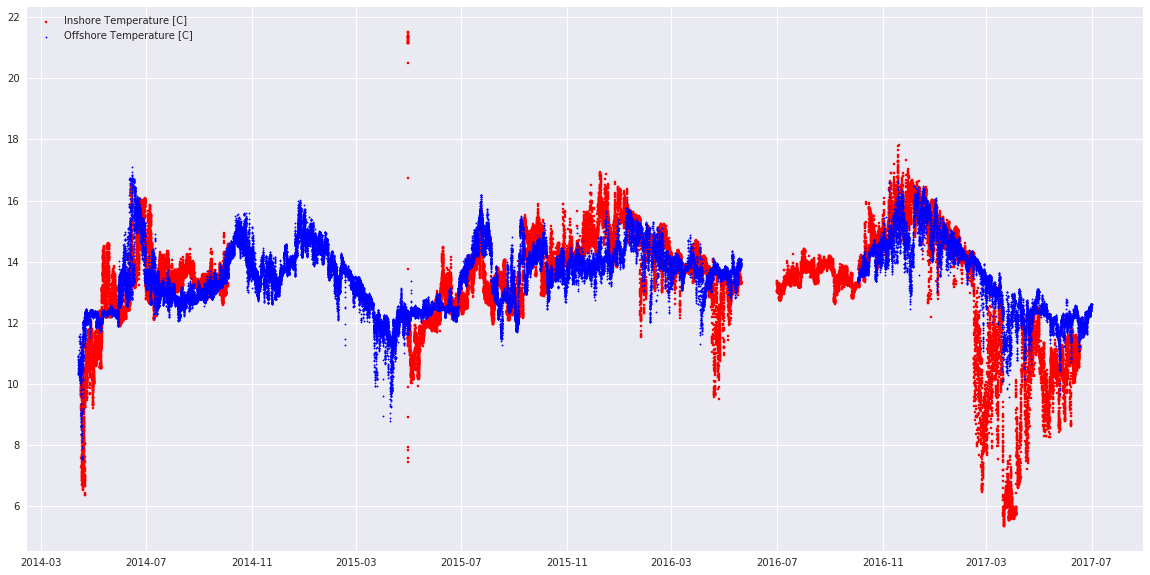

In [60]:
plt.close()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)


ax1.scatter(time1, temp1, s=2, c='r', marker="s", label='Inshore Temperature [C]')
ax1.scatter(time2, temp2, s=2, c='b', marker="o", label='Offshore Temperature [C]')


plt.legend(loc='upper left');
plt.show()


We can see a general compatibility between two data sets. However, the data for water temperature does not match for 2017-03 to 2017-07. The CTD data should be used to validate this.

Next I compare the pressure data.

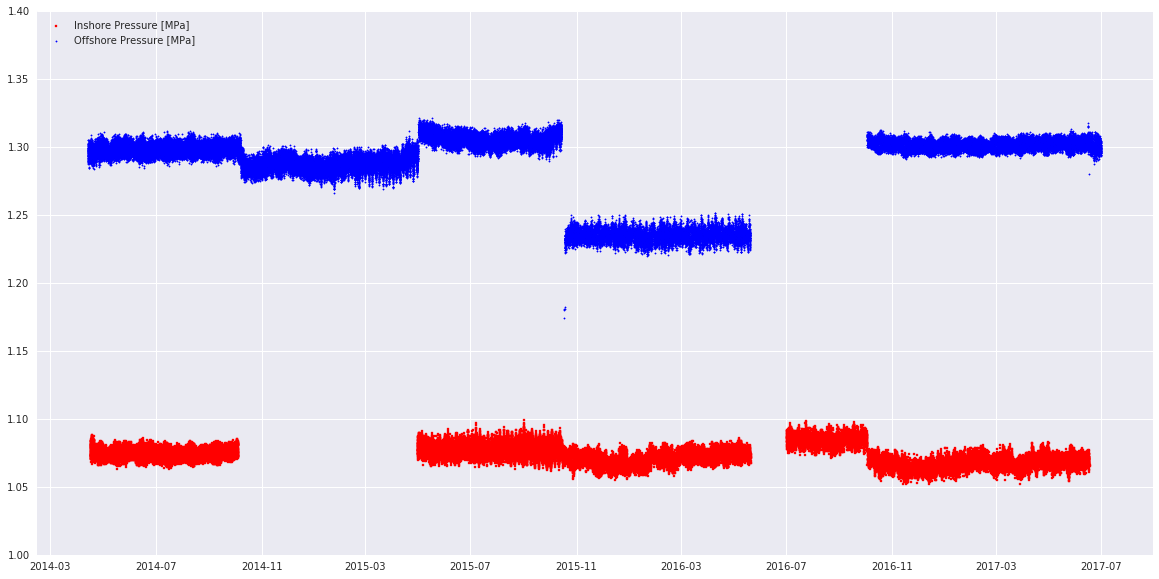

In [77]:
plt.close()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)


ax1.scatter(time1, pres1*1e-5, s=2, c='r', marker="s", label='Inshore Pressure [MPa]')
ax1.scatter(time2, pres2*1e-5, s=2, c='b', marker="o", label='Offshore Pressure [MPa]')


plt.legend(loc='upper left');
plt.ylim(1,1.4)
plt.show()


Eventhough theses data are from two different sites and the deployment depth are 25 m different, about 0.5 MPa difference in pressure (i.e about 50m difference in water depth) is worth exploring the pressure data more. 

Because of the observed issues with the pressure data all over this report, I recommend using instruments other than ADCP for pressure data.

### 6. A Closer Look

Now I focuse on the time period **2015,05,01 to 2015,10,01**. One of my goals was to take a closer look at the time period in which I saw the change in the eastward velocity direction. Thus, I first extract the bin depths, east, north, and west velocity values along the time dimensions. Like every where else in this report, I'll start with the Inshore Profiler data that'll be followed by the Offshore Profiler data.

### 6a. Central Inshore Profiler Data

In [32]:
ds3 = ds.sel(time=slice('2015-05-01 00:00:00', '2015-10-01 00:00:00'))

time_ds3 = ds3['time'].data
depth_ds3 = ds3['bin_depths'].data.T
U_ds3 = ds3['eastward_seawater_velocity'].data.T
V_ds3 = ds3['northward_seawater_velocity'].data.T
W_ds3 = ds3['upward_seawater_velocity'].data.T
temp_ds3 = ds3['temperature'].data/(100)
pres_ds3 = ds3['pressure'].data

ULim_ds3 = float("%2.2f" % np.nanpercentile(U_ds3, 90))
VLim_ds3 = float("%2.2f" % np.nanpercentile(V_ds3, 90))
WLim_ds3 = float("%2.2f" % np.nanpercentile(W_ds3, 90))
CMax_ds3 = max([ULim_ds3, VLim_ds3, WLim_ds3])
CMax_ds3

0.32

In [33]:
ds3

<xarray.Dataset>
Dimensions:                         (bin: 29, time: 14689)
Coordinates:
    obs                             (time) int64 dask.array<shape=(14689,), chunksize=(45,)>
  * time                            (time) datetime64[ns] 2015-05-01 ...
    pressure                        (time) float64 dask.array<shape=(14689,), chunksize=(45,)>
    lat                             (time) float64 dask.array<shape=(14689,), chunksize=(45,)>
    lon                             (time) float64 dask.array<shape=(14689,), chunksize=(45,)>
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 dask.array<shape=(14689,), chunksize=(45,)>
    id                              (time) |S64 dask.array<shape=(14689,), chunksize=(45,)>
    bin_1_distance                  (time) float32 dask.array<shape=(14689,), chunksize=(45,)>
    cell_length                     (time) float32 dask.array<shape=(14689,), chunksize=(45,)>
    correlation_magnitude_beam1  

Let's take a look at the pressure data for this period of time:

(1.06, 1.1)

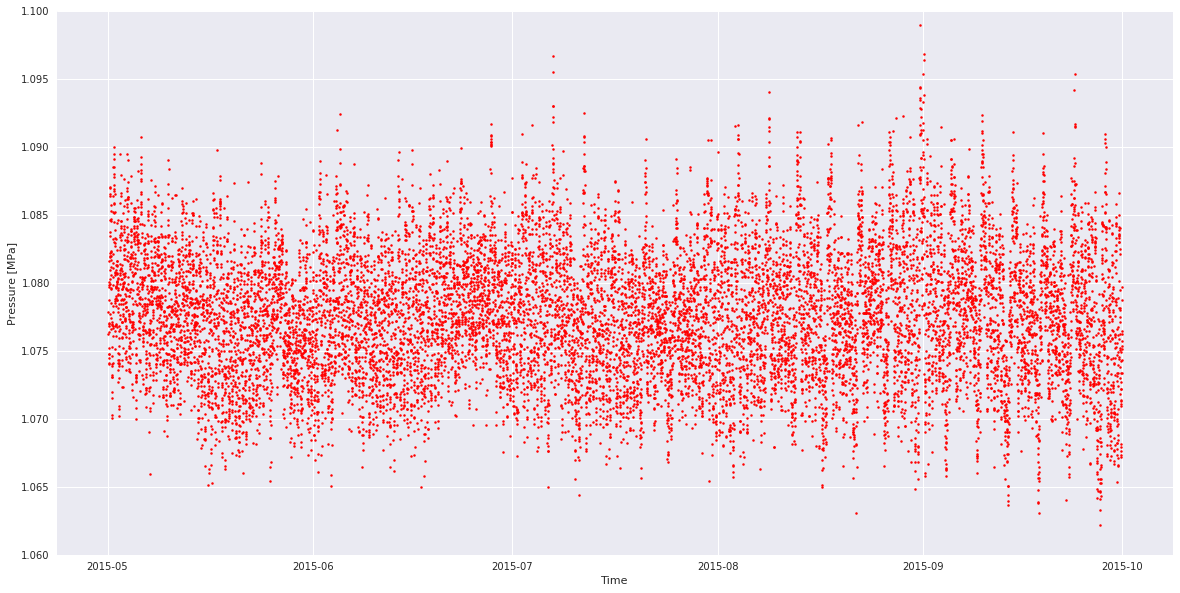

In [95]:
ax = plt.subplots(figsize = (20,10))
plt.plot(time_ds3, pres_ds3*1e-5, linestyle = 'None', marker = '.', markersize = 5,c='r')
ax[1].set_ylabel('Pressure [MPa]')
ax[1].set_xlabel('Time')
ax[1].set_ylim(1.06,1.1)

The pressure data look stable and no noisy pattern or abrupt shift can be seen for this period of time.

Now I plot the temperature over time:

Text(0.5,0,'Time')

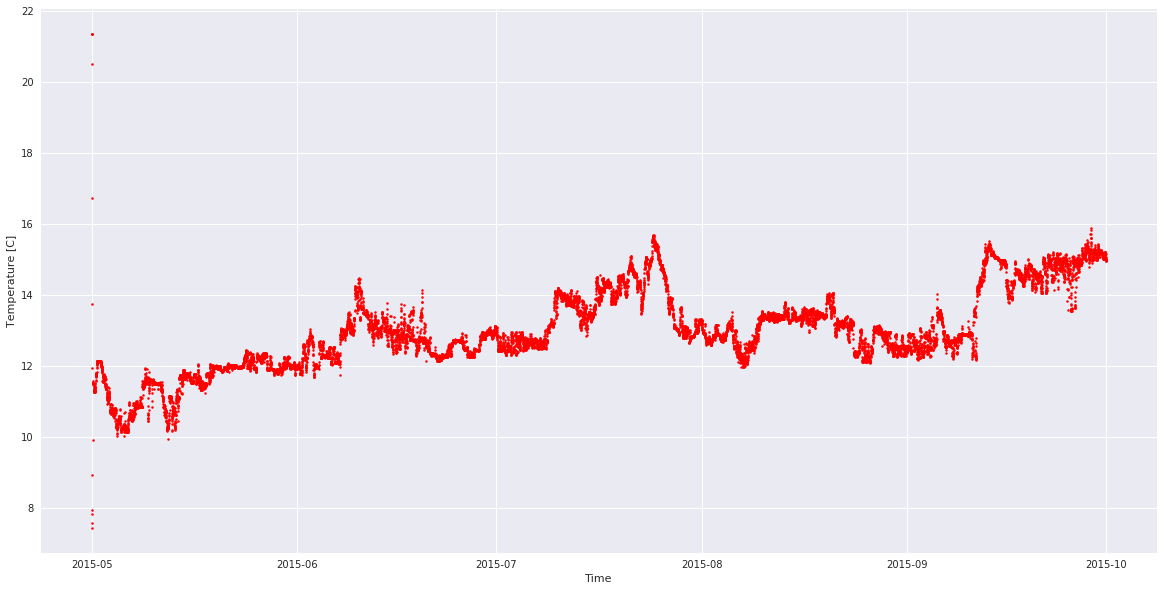

In [94]:
ax = plt.subplots(figsize = (20,10))
plt.plot(time_ds3, temp_ds3, linestyle = 'None', marker = '.', markersize = 5, c='r')
ax[1].set_ylabel('Temperature [C]')
ax[1].set_xlabel('Time')


Now I zoom at U, V, and W:

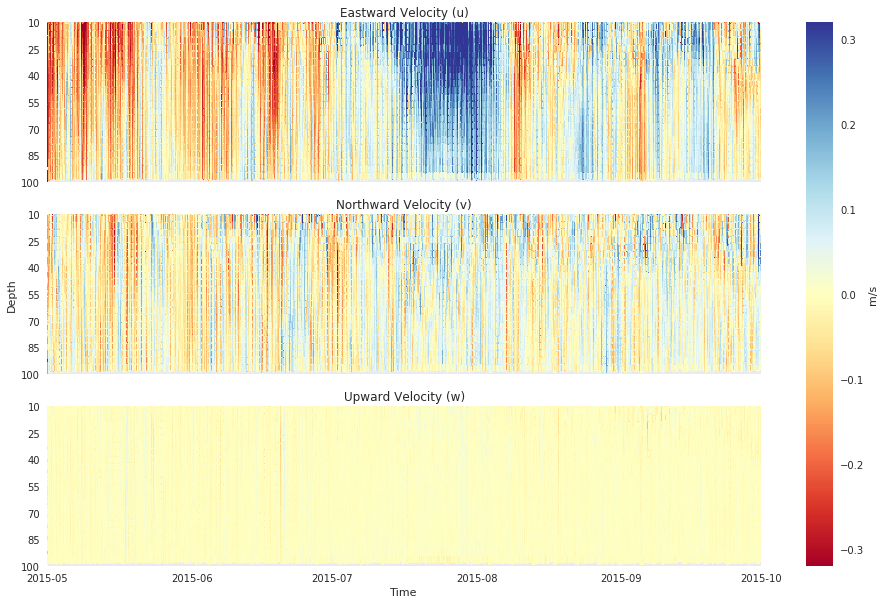

In [99]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (16,10))

YB = 100; YE = 10

p0 = axes[0].pcolormesh(time_ds3, depth_ds3, U_ds3, cmap = 'RdYlBu', vmin = -CMax_ds3, vmax = CMax_ds3)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Eastward Velocity (u)')
axes[0].yaxis.set_ticks(np.arange(10, 101, 15))

p1 = axes[1].pcolormesh(time_ds3, depth_ds3, V_ds3, cmap = 'RdYlBu', vmin = -CMax_ds3, vmax = CMax_ds3)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time_ds3, depth_ds3, W_ds3, cmap = 'RdYlBu', vmin = -CMax_ds3, vmax = CMax_ds3)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

We can see that somewhere around 2015-07 to 2015-08 the velocity direction changed from - to +. As mentioned before, this can only be true in a severe storm event. Eventhough this data matches with the offshore data, I cannot imagine an storm event which lasts for almost a month.

Now let's calculate the mean and turbulence velocity fields.

In [34]:
u_mean3 = np.nanmean(U_ds3,axis=1)
v_mean3 = np.nanmean(V_ds3,axis=1)
w_mean3 = np.nanmean(W_ds3,axis=1)

In [47]:
u_turb3 = U_ds3.T - (np.ones((14689,1))*u_mean3)
v_turb3 = V_ds3.T - (np.ones((14689,1))*v_mean3)
w_turb3 = W_ds3.T - (np.ones((14689,1))*w_mean3)

Plotting averaged velocities:

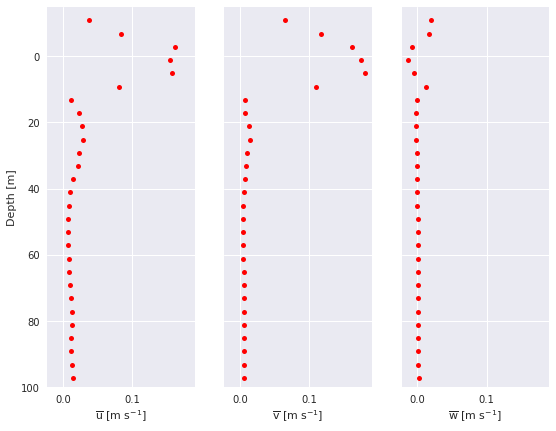

In [48]:
plt.close()
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (9,7))

p0 = axes[0].plot(u_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')

axes[0].set_ylabel('Depth [m]')
axes[0].set_xlabel('$\mathrm{\overline{u}}$ [m $\mathrm{s^{-1}}$]')

p1 = axes[1].plot(v_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')
axes[1].set_xlabel('$\mathrm{\overline{v}}$ [m $\mathrm{s^{-1}}$]')

p2 = axes[2].plot(w_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')
axes[2].set_xlabel('$\mathrm{\overline{w}}$ [m $\mathrm{s^{-1}}$]')
plt.ylim(100,-15)
plt.show()

Drawing turbulent velocities in east, north, and upward directions.

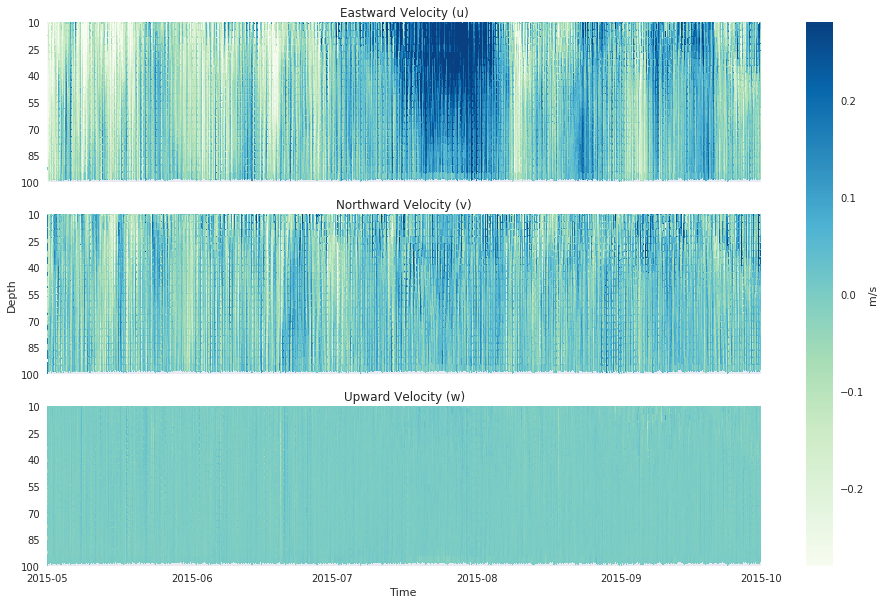

In [63]:
CTMax = max([float("%2.2f" % np.nanpercentile(u_turb3, 90)),
             float("%2.2f" % np.nanpercentile(v_turb3, 90)),
             float("%2.2f" % np.nanpercentile(w_turb3, 90))])

plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (16,10))

YB = 100; YE = 10

p0 = axes[0].pcolormesh(time_ds3, depth_ds3, u_turb3.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Eastward Velocity (u)')
axes[0].yaxis.set_ticks(np.arange(10, 101, 15))

p1 = axes[1].pcolormesh(time_ds3, depth_ds3, v_turb3.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time_ds3, depth_ds3, w_turb3.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0, ax = axes.ravel().tolist(), label='m/s')

plt.show()

Turbulent velocities pattern match with the previous calculations.

Another way to check the measurements is to monitor whether the average of turbulent velocity is zero. That's what I am doing here:

In [52]:
u_turb_mean3 = np.nanmean(u_turb3, axis=0)
v_turb_mean3 = np.nanmean(v_turb3, axis=0)
w_turb_mean3 = np.nanmean(w_turb3, axis=0)

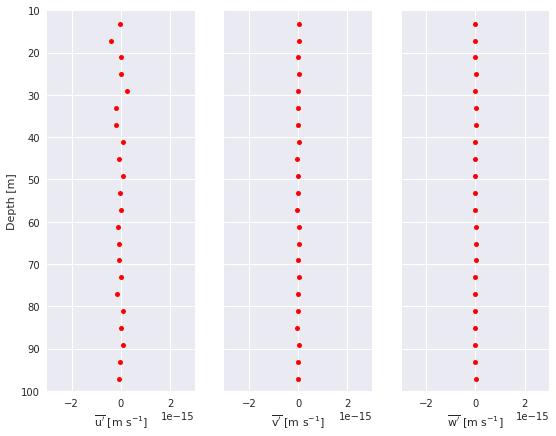

In [55]:
plt.close()
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (9,7))

p0 = axes[0].plot(u_turb_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')
axes[0].set_ylim(100,10)
axes[0].set_xlim(-3e-15,3e-15)
axes[0].set_ylabel('Depth [m]')
axes[0].set_xlabel('$\mathrm{\overline{u^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

p1 = axes[1].plot(v_turb_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')
axes[1].set_xlabel('$\mathrm{\overline{v^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

p2 = axes[2].plot(w_turb_mean3, depth1[:,1], linestyle = 'none', marker = '.', markersize = 10,c='r')
axes[2].set_xlabel('$\mathrm{\overline{w^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

plt.show()

The averages of turbulent velocities are zero which means that the data is reasonable.

Now let's plot the bad beam data.

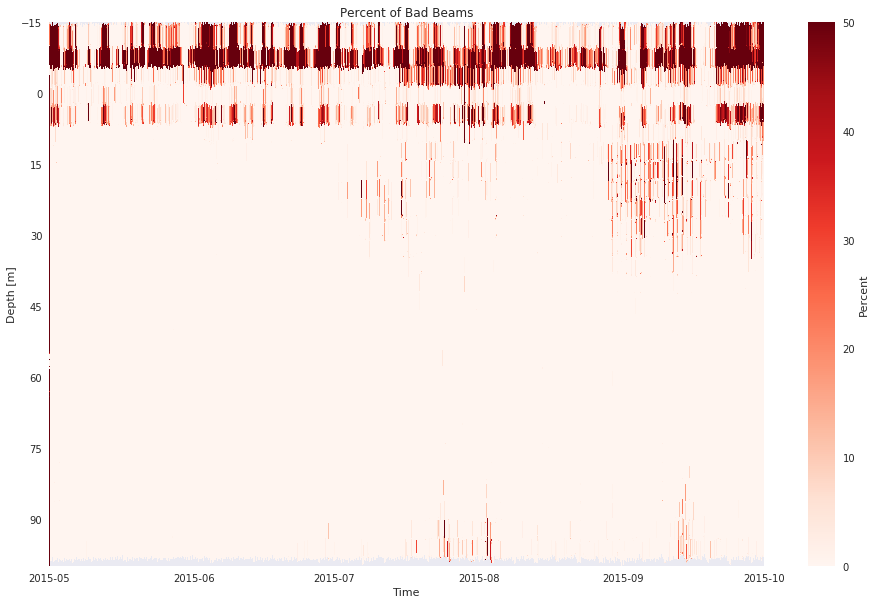

In [123]:
BadBeams_ds3 = ds3['percent_bad_beams'].data

plt.close()
fig, axes = plt.subplots(1, sharex = True, sharey = True, figsize = (16,10))

p0 = axes.pcolormesh(time_ds3, depth_ds3, BadBeams_ds3.T, cmap = 'Reds', vmin = 0, vmax = 50)#, , vmin = -CTMax, vmax = CTMax)
axes.set_ylim(100,-15)
axes.yaxis.set_ticks(np.arange(-15, 100, 15))
axes.set_xlabel('Time')
axes.set_ylabel('Depth [m]')
axes.set_title('Percent of Bad Beams')

fig.colorbar(p0, ax = axes, label='Percent')

plt.show()

The velocity data collected above the surface should be ignored and in future deployments, I recommend to setup the instrument specifications so that it does not collect any data above the surface. It can also be clearly observed that the number of bad beams increased by approaching to the surface. It translates into the fact that the collected data near to the surface are not trustable.

### 6b. Central Offshore Profiler Data

In [57]:
ds4 = ds2.sel(time=slice('2015-05-01 00:00:00', '2015-10-01 00:00:00'))

time_ds4 = ds4['time'].data
depth_ds4 = ds4['bin_depths'].data.T
U_ds4 = ds4['eastward_seawater_velocity'].data.T
V_ds4 = ds4['northward_seawater_velocity'].data.T
W_ds4 = ds4['upward_seawater_velocity'].data.T
temp_ds4 = ds4['temperature'].data/(100)
pres_ds4 = ds4['pressure'].data

ULim_ds4 = float("%2.2f" % np.nanpercentile(U_ds4, 90))
VLim_ds4 = float("%2.2f" % np.nanpercentile(V_ds4, 90))
WLim_ds4 = float("%2.2f" % np.nanpercentile(W_ds4, 90))
CMax_ds4 = max([ULim_ds4, VLim_ds4, WLim_ds4])
CMax_ds4

0.34

In [59]:
ds4

<xarray.Dataset>
Dimensions:                         (bin: 35, time: 14593)
Coordinates:
    obs                             (time) int64 dask.array<shape=(14593,), chunksize=(33,)>
  * time                            (time) datetime64[ns] 2015-05-01T18:45:00 ...
    pressure                        (time) float64 dask.array<shape=(14593,), chunksize=(33,)>
    lat                             (time) float64 dask.array<shape=(14593,), chunksize=(33,)>
    lon                             (time) float64 dask.array<shape=(14593,), chunksize=(33,)>
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 dask.array<shape=(14593,), chunksize=(33,)>
    id                              (time) |S64 dask.array<shape=(14593,), chunksize=(33,)>
    bin_1_distance                  (time) float32 dask.array<shape=(14593,), chunksize=(33,)>
    cell_length                     (time) float32 dask.array<shape=(14593,), chunksize=(33,)>
    correlation_magnitud

Pressure vs time:

Text(0.5,0,'Time')

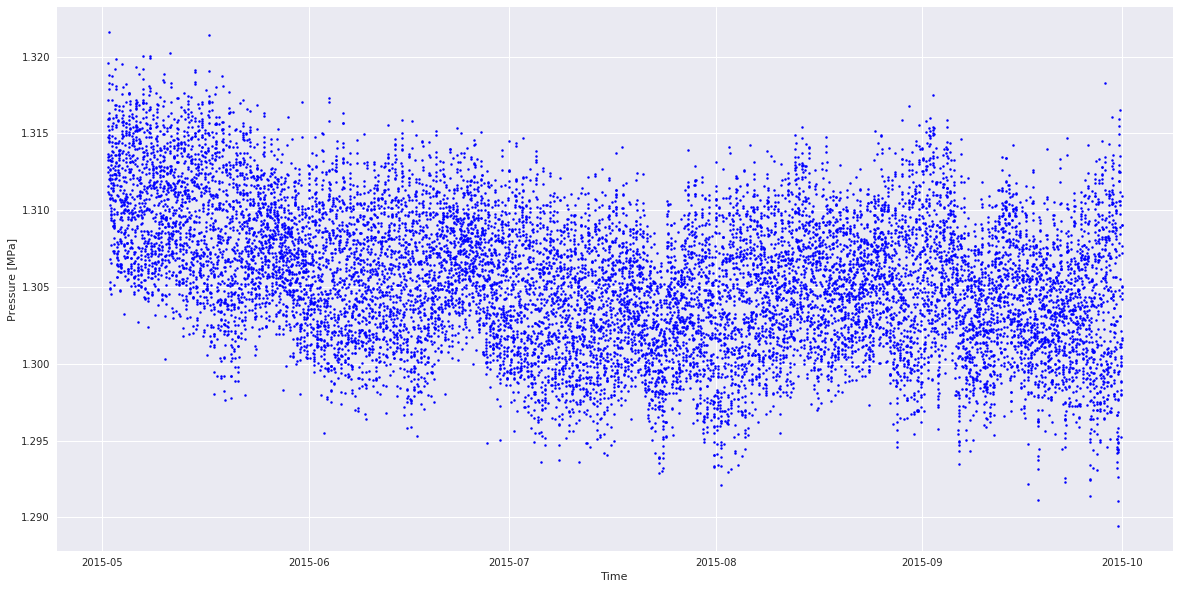

In [113]:
ax = plt.subplots(figsize = (20,10))
plt.plot(time_ds4, pres_ds4*1e-5, linestyle = 'None', marker = '.', markersize = 5,c='b')
ax[1].set_ylabel('Pressure [MPa]')
ax[1].set_xlabel('Time')


Temperature vs time:

Text(0.5,0,'Time')

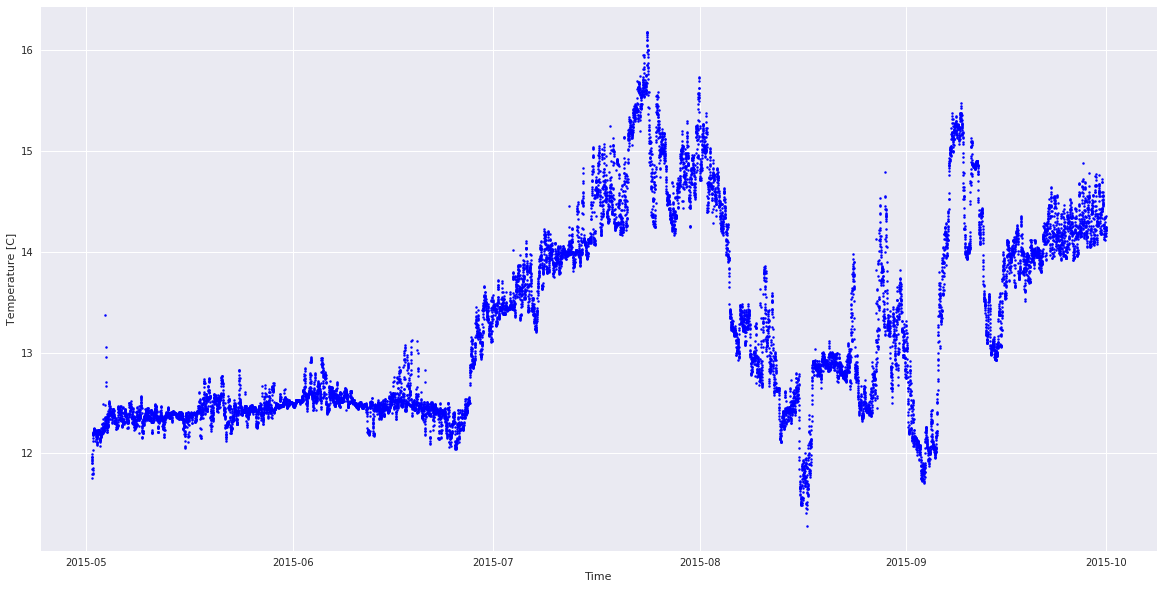

In [115]:
ax = plt.subplots(figsize = (20,10))
plt.plot(time_ds4, temp_ds4, linestyle = 'None', marker = '.', markersize = 5, c='b')
ax[1].set_ylabel('Temperature [C]')
ax[1].set_xlabel('Time')

U, V, W over time:

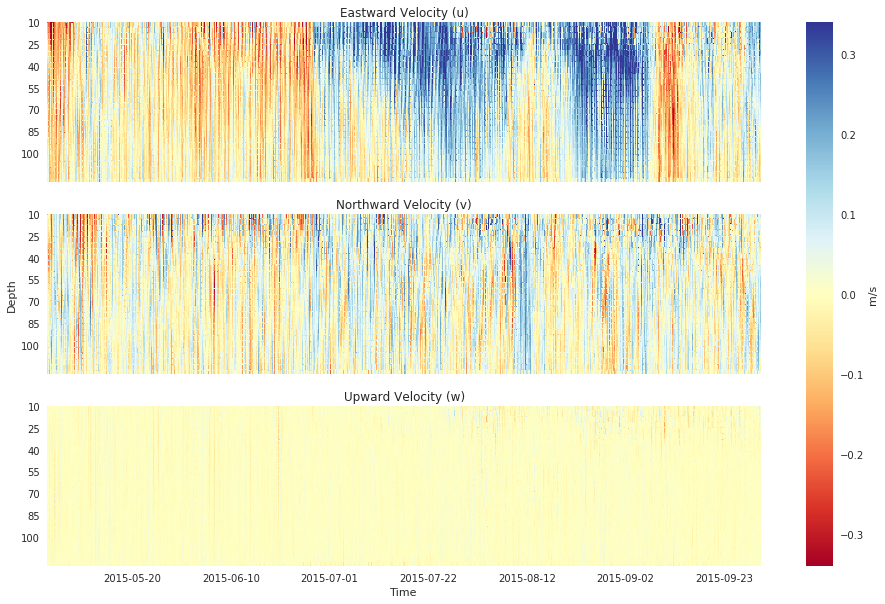

In [116]:
plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (16,10))

YB = 120; YE = 10

p0 = axes[0].pcolormesh(time_ds4, depth_ds4, U_ds4, cmap = 'RdYlBu', vmin = -CMax_ds4, vmax = CMax_ds4)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Eastward Velocity (u)')
axes[0].yaxis.set_ticks(np.arange(10, 101, 15))

p1 = axes[1].pcolormesh(time_ds4, depth_ds4, V_ds4, cmap = 'RdYlBu', vmin = -CMax_ds4, vmax = CMax_ds4)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time_ds4, depth_ds4, W_ds4, cmap = 'RdYlBu', vmin = -CMax_ds4, vmax = CMax_ds4)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')

plt.show()

Hint: Change in the eastward velocity direction. The northward velocity looks a bit noisy too.

Now let's calculate the mean and turbulence velocity fields.

In [58]:
u_mean4 = np.nanmean(U_ds4,axis=1)
v_mean4 = np.nanmean(V_ds4,axis=1)
w_mean4 = np.nanmean(W_ds4,axis=1)

In [60]:
u_turb4 = U_ds4.T - (np.ones((14593,1))*u_mean4)
v_turb4 = V_ds4.T - (np.ones((14593,1))*v_mean4)
w_turb4 = W_ds4.T - (np.ones((14593,1))*w_mean4)

Plotting averaged velocities:

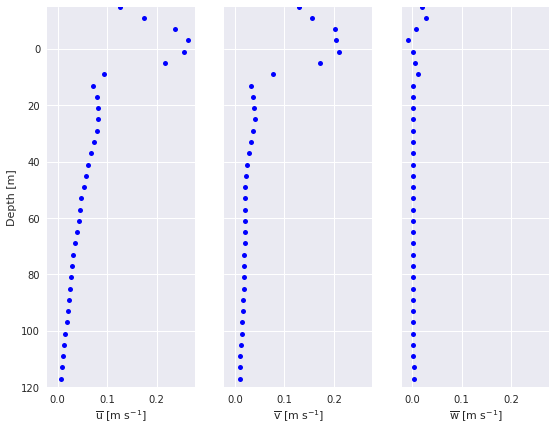

In [62]:
plt.close()
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (9,7))

p0 = axes[0].plot(u_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')

axes[0].set_ylabel('Depth [m]')
axes[0].set_xlabel('$\mathrm{\overline{u}}$ [m $\mathrm{s^{-1}}$]')

p1 = axes[1].plot(v_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')
axes[1].set_xlabel('$\mathrm{\overline{v}}$ [m $\mathrm{s^{-1}}$]')

p2 = axes[2].plot(w_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')
axes[2].set_xlabel('$\mathrm{\overline{w}}$ [m $\mathrm{s^{-1}}$]')
plt.ylim(120,-15)
plt.show()

Drawing turbulent velocities in east, north, and upward directions.

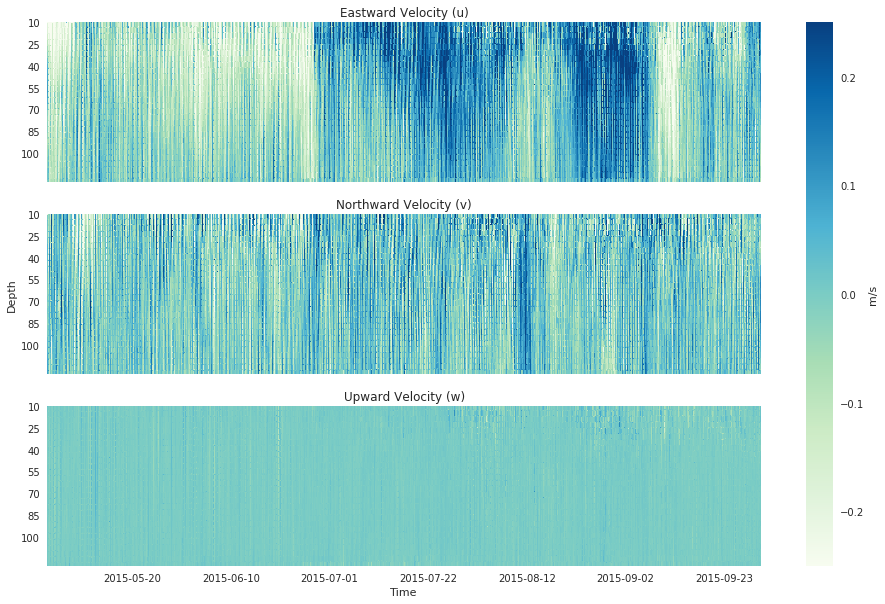

In [64]:
CTMax = max([float("%2.2f" % np.nanpercentile(u_turb4, 90)),
             float("%2.2f" % np.nanpercentile(v_turb4, 90)),
             float("%2.2f" % np.nanpercentile(w_turb4, 90))])

plt.close()
fig, axes = plt.subplots(3, sharex = True, sharey = True, figsize = (16,10))

YB = 120; YE = 10

p0 = axes[0].pcolormesh(time_ds4, depth_ds4, u_turb4.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[0].set_ylim(YB,YE)
axes[0].set_title('Eastward Velocity (u)')
axes[0].yaxis.set_ticks(np.arange(10, 101, 15))

p1 = axes[1].pcolormesh(time_ds4, depth_ds4, v_turb4.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[1].set_title('Northward Velocity (v)')
axes[1].set_ylabel('Depth')

p2 = axes[2].pcolormesh(time_ds4, depth_ds4, w_turb4.T, cmap = 'GnBu', vmin = -CTMax, vmax = CTMax)
axes[2].set_title('Upward Velocity (w)')
axes[2].set_xlabel('Time')

fig.colorbar(p0, ax = axes.ravel().tolist(), label='m/s')

plt.show()

Let's check if the average of turbulent velocity is zero.

In [66]:
u_turb_mean4 = np.nanmean(u_turb4, axis=0)
v_turb_mean4 = np.nanmean(v_turb4, axis=0)
w_turb_mean4 = np.nanmean(w_turb4, axis=0)

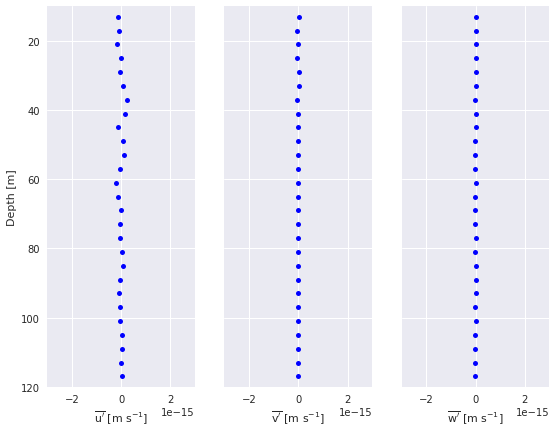

In [67]:
plt.close()
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (9,7))

p0 = axes[0].plot(u_turb_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')
axes[0].set_ylim(120,10)
axes[0].set_xlim(-3e-15,3e-15)
axes[0].set_ylabel('Depth [m]')
axes[0].set_xlabel('$\mathrm{\overline{u^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

p1 = axes[1].plot(v_turb_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')
axes[1].set_xlabel('$\mathrm{\overline{v^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

p2 = axes[2].plot(w_turb_mean4, depth2[:,1], linestyle = 'none', marker = '.', markersize = 10,c='b')
axes[2].set_xlabel('$\mathrm{\overline{w^{\prime}}}$ [m $\mathrm{s^{-1}}$]')

plt.show()

Now let's plot the bad beam data.

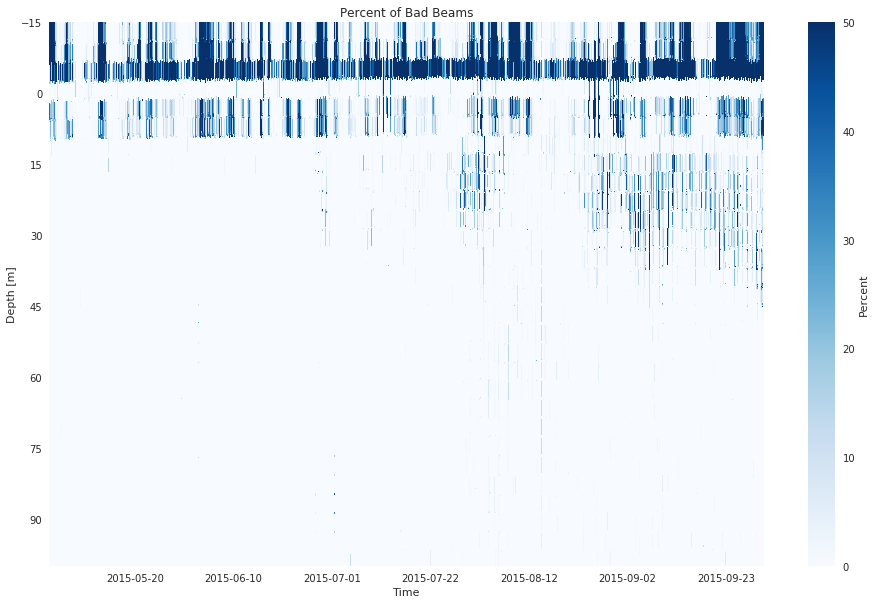

In [124]:
BadBeams_ds4 = ds4['percent_bad_beams'].data

plt.close()
fig, axes = plt.subplots(1, sharex = True, sharey = True, figsize = (16,10))

p0 = axes.pcolormesh(time_ds4, depth_ds4, BadBeams_ds4.T, cmap = 'Blues', vmin = 0, vmax = 50)#, , vmin = -CTMax, vmax = CTMax)
axes.set_ylim(100,-15)
axes.yaxis.set_ticks(np.arange(-15, 100, 15))
axes.set_xlabel('Time')
axes.set_ylabel('Depth [m]')
axes.set_title('Percent of Bad Beams')

fig.colorbar(p0, ax = axes, label='Percent')

plt.show()

The velocity data collected above the surface should be ignored and in future deployments, I recommend to setup the instrument specifications so that it does not collect any data above the surface. It can also be clearly observed that the number of bad beams increased by approaching to the surface. It translates into the fact that the collected data near to the surface are not trustable.

### 6c. Compare the results for Inshore and Offshore Profilers for 2015-05 to 2015-10

Now let's compare the results we got for the zoomed period of time to better understand the differences/similarities.

Comparing temperature data:

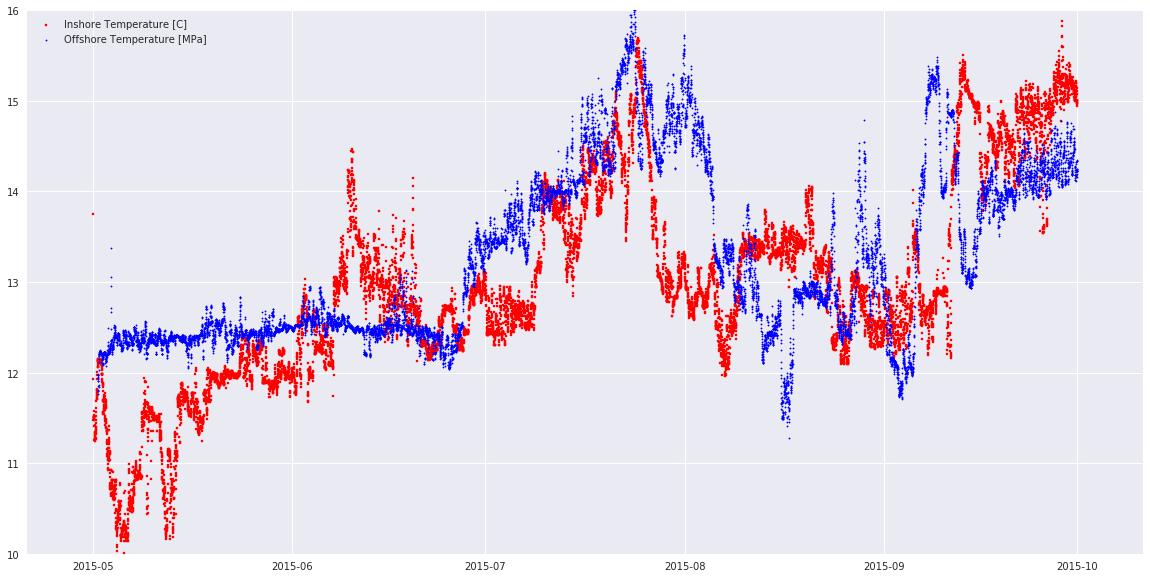

In [133]:
plt.close()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)


ax1.scatter(time_ds3, temp_ds3, s=2, c='r', marker="s", label='Inshore Temperature [C]')
ax1.scatter(time_ds4, temp_ds4, s=2, c='b', marker="o", label='Offshore Temperature [MPa]')


plt.legend(loc='upper left');
plt.ylim(10,16)
plt.show()


Comparing pressure data:

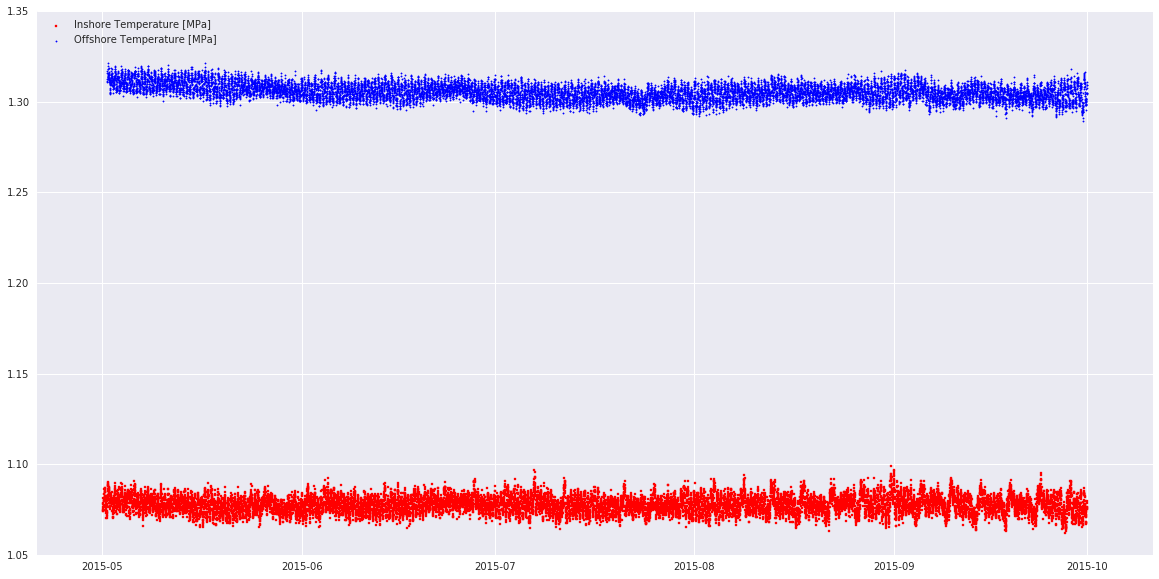

In [131]:
plt.close()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)


ax1.scatter(time_ds3, pres_ds3*1e-5, s=2, c='r', marker="s", label='Inshore Temperature [MPa]')
ax1.scatter(time_ds4, pres_ds4*1e-5, s=2, c='b', marker="o", label='Offshore Temperature [MPa]')


plt.legend(loc='upper left');
plt.ylim(1.05,1.35)
plt.show()


Comparing % bad beams:

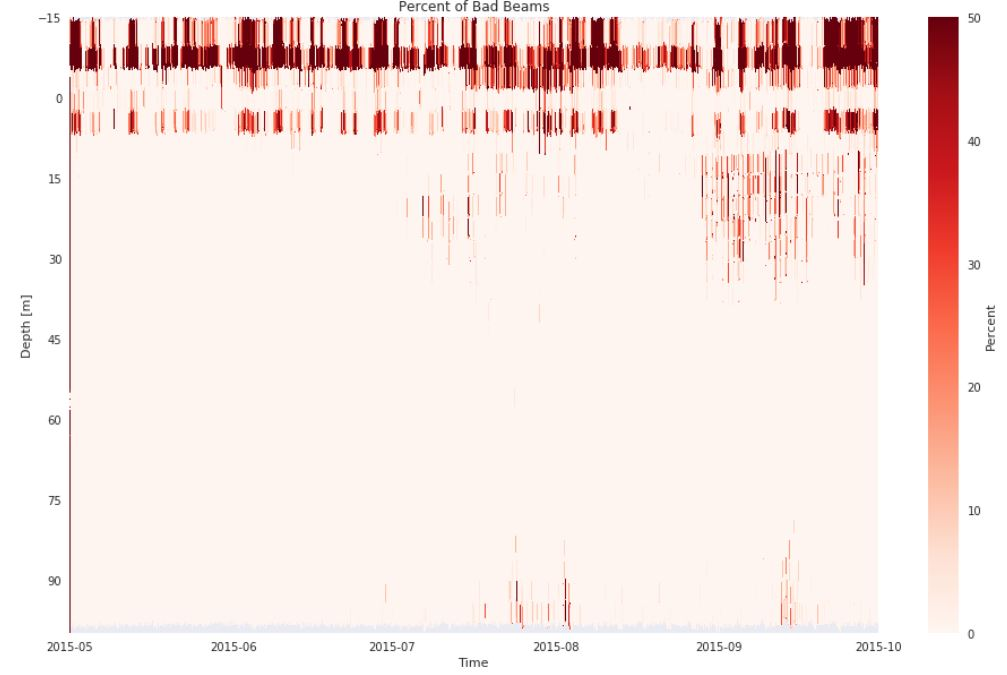

In [137]:
from IPython.display import Image
Image(filename='8.JPG',width=1000)

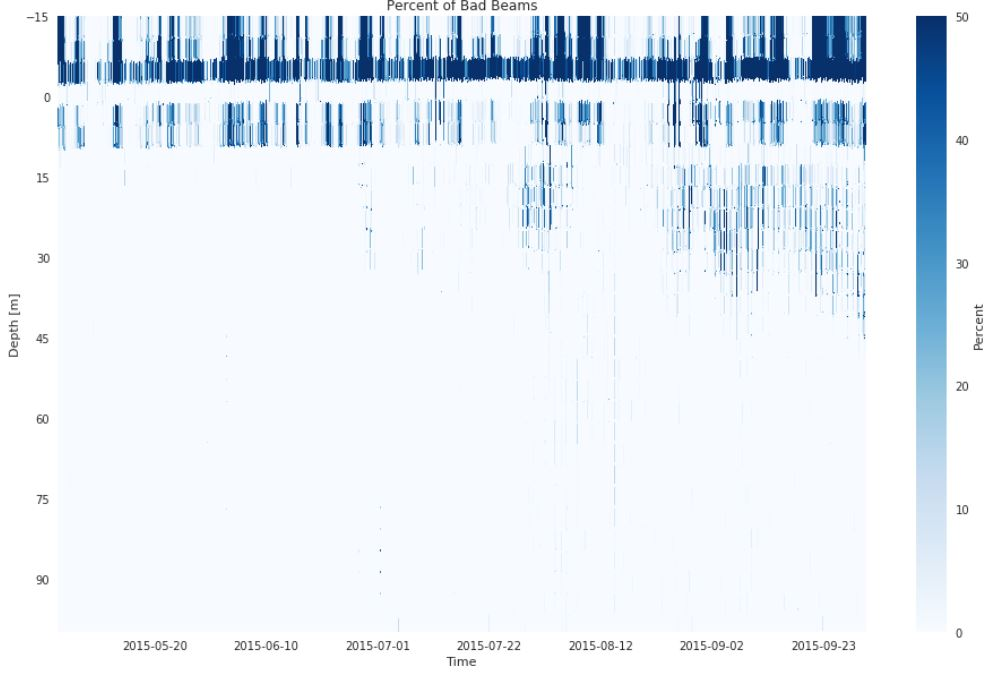

In [138]:
from IPython.display import Image
Image(filename='9.JPG',width=1000)

Comparing velocities:

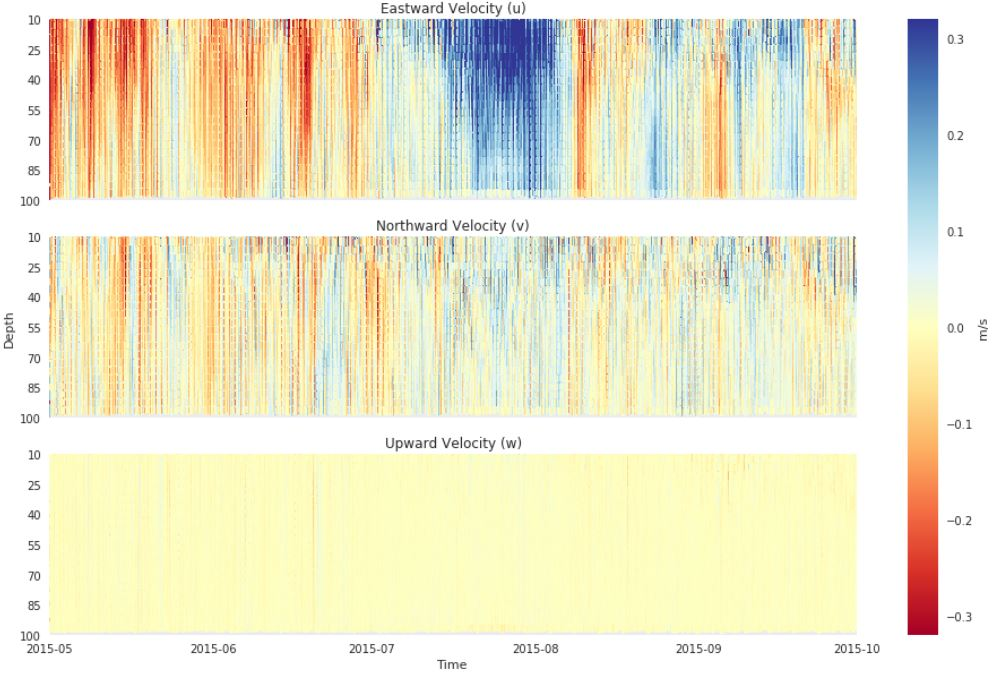

In [139]:
from IPython.display import Image
Image(filename='10.JPG',width=1000)

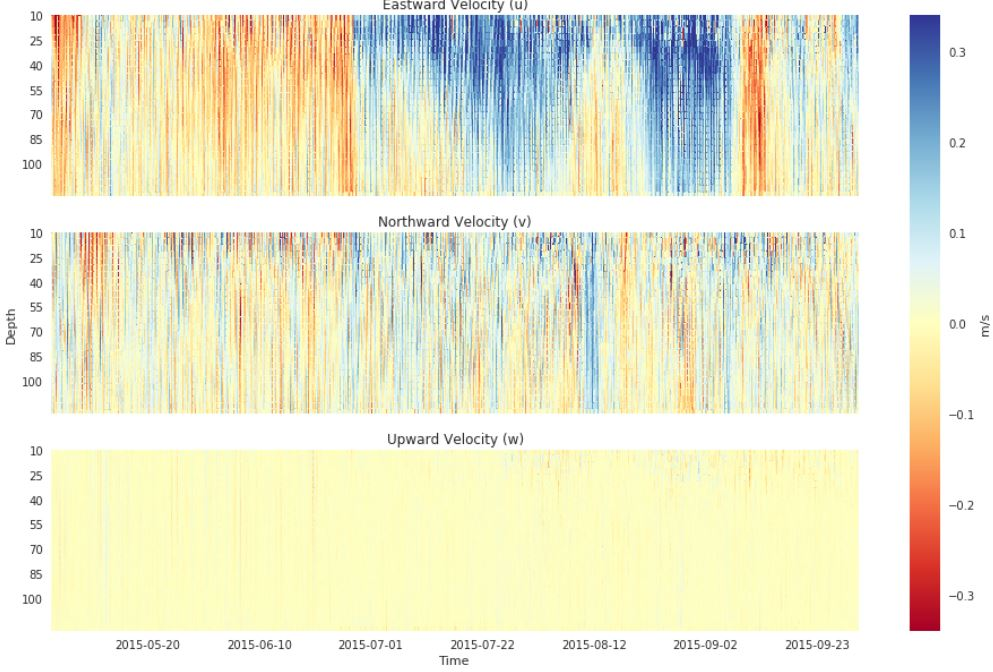

In [140]:
from IPython.display import Image
Image(filename='11.JPG',width=1000)

## 7. Conclusions

Based on this analysis of the Coastal Pioneer Central Inshore  (CP02PMCI) and Offshore (CP02PMCO) Profilers ADCP data, the following takeaways can be noted:

* The data gathered using two ADCP Profilers generally matched.
* More investigation is needed for the observed change in velocity direction for 2015-5 to 2015-10. An annotation should be added to the system if an extreme event has been experienced for that period of time.
* In general, the temperature, and velocity field components look mostly reasonable and there are no major outliers.
* Temperature data did not match for 2017 period for Inshore and Offshore stations. It’s better to use more accurate temperature sensors or CTD data for accurate temperature measurements.
* Caution should be practiced while using pressure data. Note that a 1 MPa difference in pressure translates to  ~100m difference in water depth.
* ADCPs seems not to be calibrated based on USGS recommendations or the calibration information is not reported. Moreover, no calibration sheet was available for 3d velocity meters.
* ADCPs collected data above the surface that should be disregarded. Moreover, the velocity data were noisy near to the surface.
* The average value of pitch, roll, and heading followed the expectations.
* The units of pitch, roll, and heading should be centi-degree instead of deci-degree.

* The data seems to be consistent with known physical processes, though additional datasets would need to be consulted to confirm.  This includes, for example,
  * The mean vertical velocity is almost zero.
  * The mean turbulent velocity fields are almost zero.
  * Velocity trends matched for both ADCPs.
 
* The percent of bad beams increased as we get closer to the surface. This means that the data is not trustable near to surface.
* A more quantitative comparison is needed to fully elaborate the difference in inshore/offshore coastal velocity patterns.

 